In [751]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.utils import shuffle
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings("ignore")

In [752]:
boston_df = pd.read_csv('Boston.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Boston Exploratory Data Analysis & Data Preprocessing

 Variables in order:<br>
 - **CRIM**     per capita crime rate by town
 - **ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.
 - **INDUS**    proportion of non-retail business acres per town
 - **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - **NOX**      nitric oxides concentration (parts per 10 million)
 - **RM**       average number of rooms per dwelling
 - **AGE**      proportion of owner-occupied units built prior to 1940
 - **DIS**     weighted distances to five Boston employment centres
 - **RAD**      index of accessibility to radial highways
 - **TAX**      full-value property-tax rate per \$10,000
 - **PTRATIO**  pupil-teacher ratio by town
 - **BLACK**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - **LSTAT**    % lower status of the population
 - **MEDV**     Median value of owner-occupied homes in $1000's

In [753]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [754]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [755]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


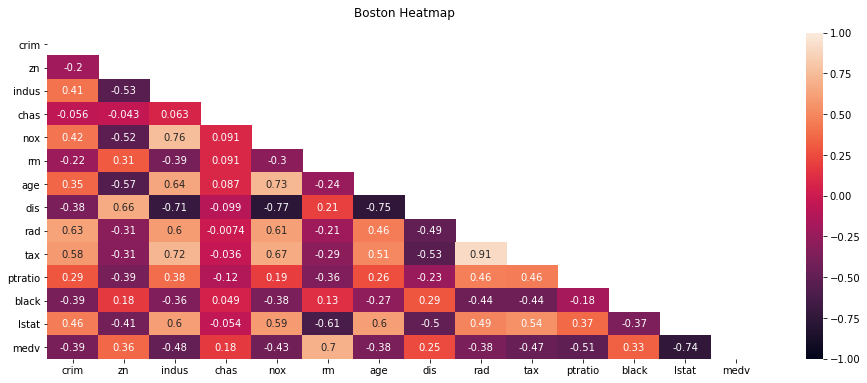

In [756]:
np.triu(np.ones_like(boston_df.corr()))
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(boston_df.corr(), dtype=np.bool))
boston_heatmap = sns.heatmap(boston_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
boston_heatmap.set_title('Boston Heatmap', fontdict={'fontsize':12}, pad=16);
plt.savefig('boston_heatmap.png')

**NB:** Multicollinearity is evident from heatmap correlation values

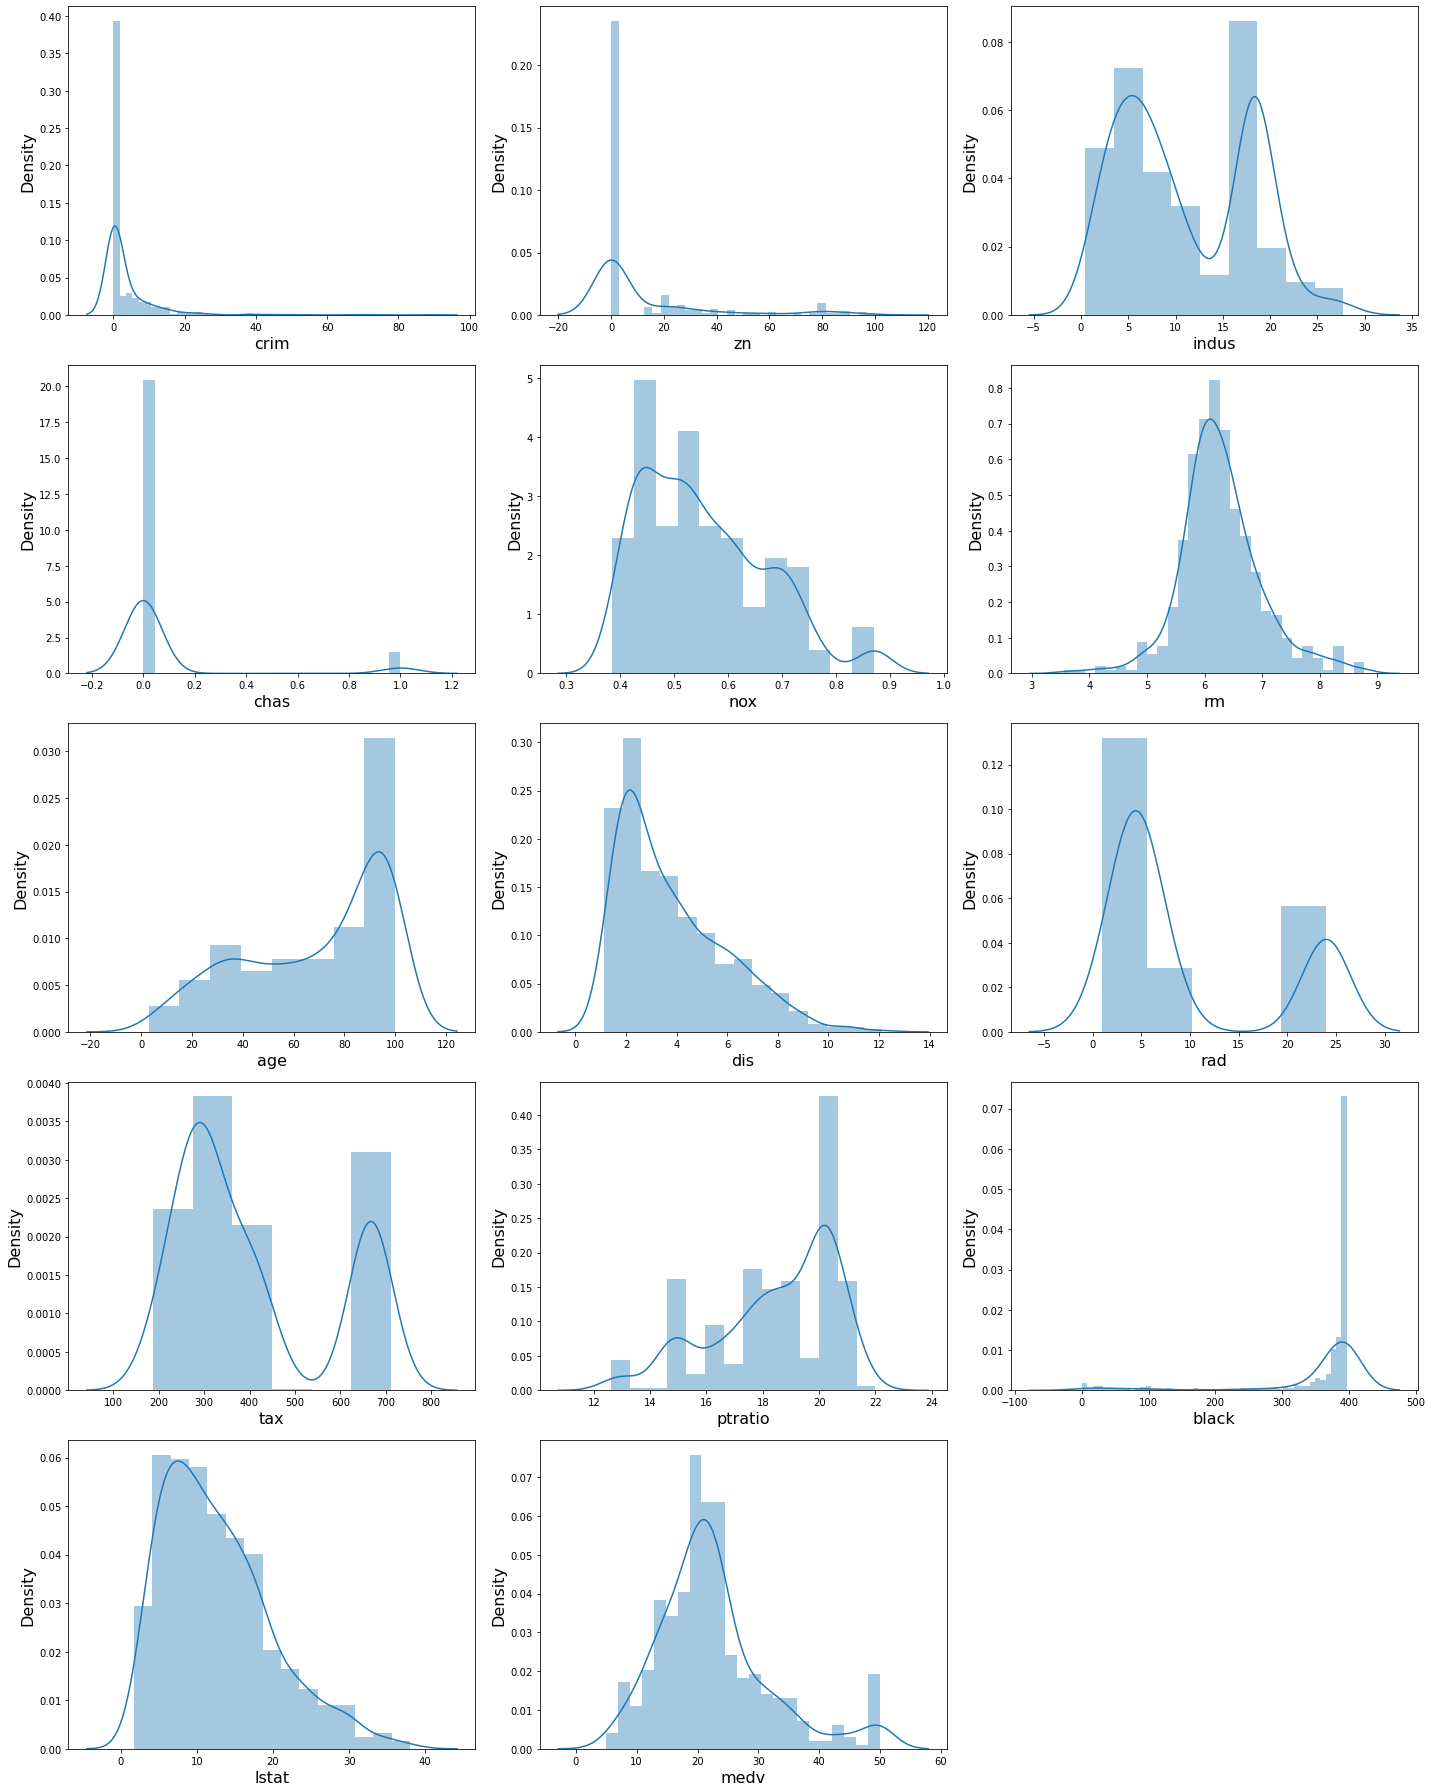

In [757]:
# Boston data distribution
fig1=plt.figure(figsize = (20, 25))
plot = 1

for column in boston_df:
    if plot <= len(boston_df.columns):
        ax = plt.subplot(5, 3, plot)
        sns.distplot(boston_df[column])
        plt.xlabel(column, fontsize = 16)
        plt.ylabel("Density",fontsize = 16)
    plot += 1
    
plt.tight_layout()
plt.show()
fig1.savefig('boston_distribution.png')

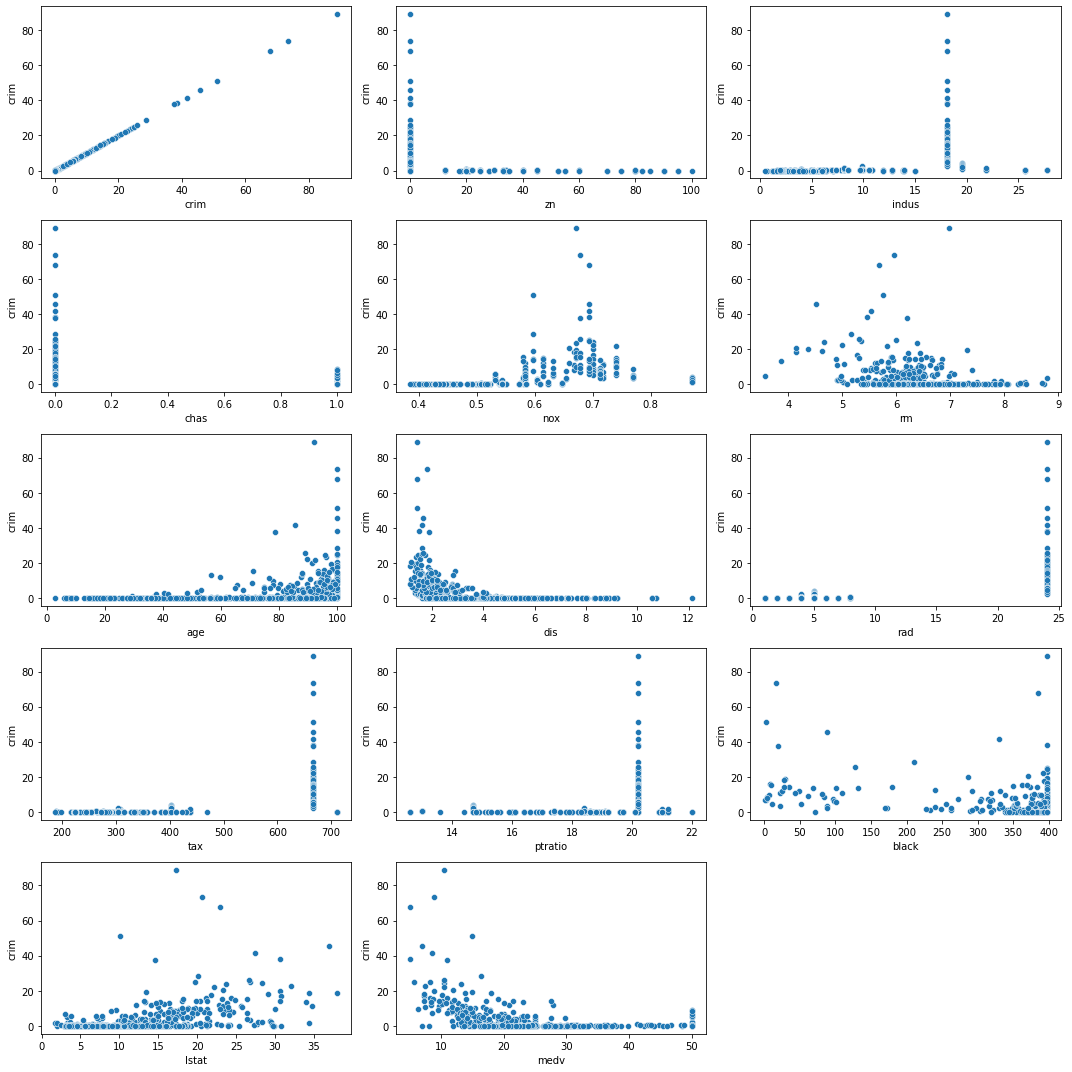

In [758]:
# Plotting `crim` against other columns
fig2=plt.figure(figsize = (15, 15))
plot = 1

for column in boston_df:
    if plot <= len(boston_df.columns):
        ax = plt.subplot(5, 3, plot)
        sns.scatterplot(x = boston_df[column], y = boston_df['crim'])
    plot += 1

plt.tight_layout()
plt.show()
fig2.savefig('boston_depVcorr.png')

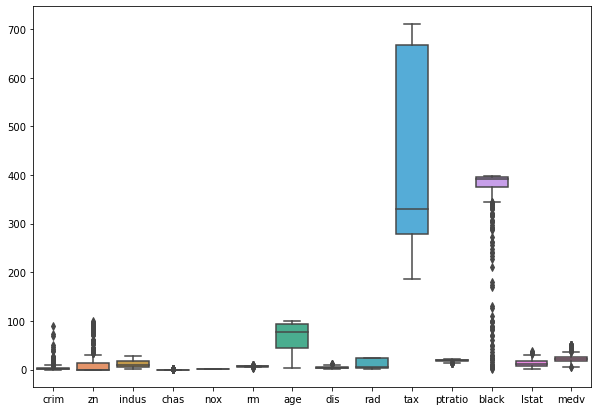

In [759]:
# looking for outliers using box plot
fig3=plt.figure(figsize = (10, 7))
sns.boxplot(data = boston_df, width = 0.8)
plt.show()
fig3.savefig('boston_boxplot')

There are a lot of outliers so it would be a good idea to scale the data. That way, we can reduce the range/variability of the data while still keeping outlier information.

In [760]:
#set features (independent variables; predictors)
X_features = boston_df.drop(['crim'], axis=1) #20 features AKA independent variables

#set target (dependent variable; to be predicted)
y_target = boston_df['crim'] #1 target AKA dependent variable

print("Feature shape: ", X_features.shape)
print("Target shape: ", y_target.shape)

Feature shape:  (506, 13)
Target shape:  (506,)


### Using Variance Inflation Factor (VIF) to further highlight multicollinearity
VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. 
The VIF score of an independent variable represents how well the variable is explained by other independent variables.<br>VIF > 5 indicates high multicollinearity between this independent variable and the others

Code adapted from Bhandari, A (2020) What is Multicollinearity? Here’s Everything You Need to Know. Analytics Vidhya. [Source code]. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [761]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X_features.columns
    vif["VIF"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]
    return(vif)

In [762]:
calc_vif(X_features)

,variables,VIF
0,zn,2.877684
1,indus,14.461633
2,chas,1.175166
3,nox,73.920376
4,rm,134.753271
5,age,21.398339
6,dis,15.193886
7,rad,14.248370
8,tax,61.920251
9,ptratio,87.226675


Quite a few features have high multicollinearity based upon the heatmap, and therefore high VIF values. Dropping some of the correlated features will likely help in bringing down the multicollinearity. Hypothesis test results may help in determining which features to drop.

In [763]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 96)

In [764]:
X_train #before scaling

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
33,0.0,8.14,0,0.538,5.701,95.0,3.7872,4,307,21.0,358.77,18.35,13.1
285,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
172,0.0,4.05,0,0.510,5.572,88.5,2.5961,5,296,16.6,396.90,14.69,23.1
356,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
436,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04,21.2
364,0.0,18.10,1,0.718,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
422,0.0,18.10,0,0.614,5.648,87.6,1.9512,24,666,20.2,291.55,14.10,20.8
474,0.0,18.10,0,0.584,5.427,95.4,2.4298,24,666,20.2,352.58,18.14,13.8


In [765]:
y_train #no scaling as not necessary

33      1.15172
285     0.01096
172     0.13914
356     8.98296
436    14.42080
         ...   
116     0.13158
364     3.47428
422    12.04820
474     8.05579
84      0.05059
Name: crim, Length: 404, dtype: float64

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Multiple Linear Regression (Boston Dataset)

Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. 

- Equation: **Y = β0 + β1X1 + β2X2 + β3X3 + … + βnXn + e**
- Y = Dependent (target) variable / Target variable
- **β0** = Line Intercept 
- **β1, β2, β3, …. βn** = Slope of the line
- X1, X2, X3, ….Xn = Independent variables (predictors)
- **e** = Error

**Null Hypothesis:** States that the coefficient associated with the independent variable is equal to zero. (H0: βj=0)<br> In other words, there is no relationship between the independent(predictor) variable in question and the dependent(target) variable.

The p-value for each term tests the **null hypothesis** that the **coefficient is equal to zero (no effect)**. A low p-value (< 0.05) indicates that the null hypothesis can be rejected. In other words, a predictor that has a low p-value is meaningful and has an effect on the response variable. A p-value >= 0.05 ,on the other hand, suggests that changes in a predictor are not associated with changes in the response.

In [766]:
#scale data to reduce variability (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Sidenote:** Scaling the entire dataframe(features & target) vs scaling just the features appears to affect the R2 score and p-values of predictors.

In [767]:
X_train #after scaling

array([[-0.47743946, -0.41747288, -0.27288841, ...,  0.02453907,
         0.78348971, -1.02629139],
       [ 1.86987878, -1.27584424, -0.27288841, ...,  0.41757449,
        -0.60787443, -0.07571609],
       [-0.47743946, -1.01352362, -0.27288841, ...,  0.44140807,
         0.28028884,  0.04177075],
       ...,
       [-0.47743946,  1.03403456, -0.27288841, ..., -0.71036609,
         0.19917176, -0.20388354],
       [-0.47743946,  1.03403456, -0.27288841, ..., -0.04313518,
         0.75461753, -0.95152704],
       [-0.47743946, -0.94940081, -0.27288841, ...,  0.44140807,
        -0.41676809,  0.12721572]])

In [768]:
y_train #not scaled

33      1.15172
285     0.01096
172     0.13914
356     8.98296
436    14.42080
         ...   
116     0.13158
364     3.47428
422    12.04820
474     8.05579
84      0.05059
Name: crim, Length: 404, dtype: float64

In [769]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Statsmodels OLS summary 

In [770]:
X_tn = sm.add_constant(X_train)
#fitting the model with the training data
model_mlr = sm.OLS(y_train, X_tn).fit()
print(model_mlr.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     22.97
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.11e-40
Time:                        15:57:57   Log-Likelihood:                -1348.1
No. Observations:                 404   AIC:                             2724.
Df Residuals:                     390   BIC:                             2780.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6500      0.345     10.591      0.0

**NB:** The R2 score given in the model summary is a result of the model fitting AND predicting on the training data alone.<br>In order to get the R2 score for the test data, use the trained model to predict the target for the test data (see next cell).

In [771]:
X_tt = sm.add_constant(X_test)
#Trying out the model on the test data
predictions = model_mlr.predict(X_tt) #predict out of sample
print(f"R2 score: {metrics.r2_score(y_test, predictions)}")
print(f"MSE: {metrics.mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}")

R2 score: 0.5977480336533103
MSE: 17.01524561235551
RMSE: 4.1249540133625135


### Sklearn LinearRegression

In [772]:
#replicating initial OLS model summary result for R2 score to prove the model fits and predicts using only the train data
#same R2 score of 0.4336667355312528 (not rounded) is derived
"""
mullinear_regr = LinearRegression()
mullinear_regr.fit(X_train, y_train)
mullinear_regr_predictions = mullinear_regr.predict(X_train)
print(f"R2 score: {metrics.r2_score(y_train, mullinear_regr_predictions)}")
"""

'\nmullinear_regr = LinearRegression()\nmullinear_regr.fit(X_train, y_train)\nmullinear_regr_predictions = mullinear_regr.predict(X_train)\nprint(f"R2 score: {metrics.r2_score(y_train, mullinear_regr_predictions)}")\n'

In [773]:
#Sklearn model is trained/fitted using the training data and predicts using the test data
#R2 score matches R2 score for OLS model using test data
mullinear_regr = LinearRegression()
mullinear_regr.fit(X_train, y_train)
mullinear_regr_predictions = mullinear_regr.predict(X_test)
#print(metrics.r2_score(y_train, mullinear_regr_predictions))

mullinear_df = pd.DataFrame({
    'Actual Value': y_test,
    'MLR Prediction': mullinear_regr_predictions,
})

print(mullinear_df)
print()

print(f"MLR coefficients: {mullinear_regr.coef_}\n\nMLR intercept {mullinear_regr.intercept_}")
print()
print(f"""MLR train score: {mullinear_regr.score(X_train, y_train)}
\nMLR test score: {mullinear_regr.score(X_test, y_test)}
\nMLR MAE: {metrics.mean_absolute_error(y_test, mullinear_regr_predictions)}
\nMLR MSE: {metrics.mean_squared_error(y_test, mullinear_regr_predictions)}
\nMLR RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mullinear_regr_predictions))}
\nMLR R2 Score: {metrics.r2_score(y_test, mullinear_regr_predictions)}
""")

     Actual Value  MLR Prediction
495       0.17899        1.232826
288       0.04590        2.217426
251       0.21409       -1.184271
77        0.08707        0.946951
468      15.57570       11.890788
..            ...             ...
242       0.10290        1.834309
394      13.35980       12.840317
346       0.06162       -2.679535
118       0.13058        3.312369
23        0.98843        1.889456

[102 rows x 2 columns]

MLR coefficients: [ 1.17794355 -0.4360456  -0.25054109 -1.41926606  0.48902389  0.16708815
 -2.23041638  5.54658972 -0.90697324 -0.68373103 -0.61543652  0.96968639
 -2.10413269]

MLR intercept 3.650047549504952

MLR train score: 0.4336667355312528

MLR test score: 0.59774803365331

MLR MAE: 2.8058588179729314

MLR MSE: 17.015245612355525

MLR RMSE: 4.124954013362515

MLR R2 Score: 0.59774803365331



### Sklearn summary
Below code adapted from JARH (2017) Find p-value (significance) in scikit-learn LinearRegression. Stack Overflow. [Source code]. https://stackoverflow.com/a/42677750

In [774]:
# same as statsmodels summary results for significance (p-values)
params = np.append(mullinear_regr.intercept_,mullinear_regr.coef_)
predictions = mullinear_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})

sk_summary

,Coefficients,std errs,t values,p-values
const,3.6500,0.345,10.591,0.000
zn,1.1779,0.544,2.166,0.031
indus,-0.4360,0.703,-0.620,0.536
chas,-0.2505,0.362,-0.692,0.489
nox,-1.4193,0.744,-1.906,0.057
rm,0.4890,0.522,0.937,0.349
age,0.1671,0.625,0.267,0.789
dis,-2.2304,0.751,-2.969,0.003
rad,5.5466,0.926,5.988,0.000
tax,-0.9070,1.050,-0.864,0.388


**Conclusion**: For the Multiple Linear Regression model, we reject the null hypothesis for
- zn (p= 0.031)
- dis (p= 0.003)
- rad (p= 0.000)
- medv (p= 0.001)

In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

### Retrain MLR model with selected features zn, dis, rad, medv

In [775]:
X_selected_features=X_features[['zn', 'dis', 'rad', 'medv']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,zn,dis,rad,medv
0,18.0,4.0900,1,24.0
1,0.0,4.9671,2,21.6
2,0.0,4.9671,2,34.7
3,0.0,6.0622,3,33.4
4,0.0,6.0622,3,36.2


In [776]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [777]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [778]:
mullinear_regr = LinearRegression()
mullinear_regr.fit(X_train_fs, y_train)
mullinear_regr_predictions = mullinear_regr.predict(X_test_fs)

mullinear_df = pd.DataFrame({
    'Actual Value': y_test,
    'MLR Prediction': mullinear_regr_predictions,
})

print(mullinear_df)
print()

print(f"MLR coefficients: {mullinear_regr.coef_}\n\nMLR intercept {mullinear_regr.intercept_}")
print()
print(f"""MLR train score: {mullinear_regr.score(X_train_fs, y_train)}
\nMLR test score: {mullinear_regr.score(X_test_fs, y_test)}
\nMLR MAE: {metrics.mean_absolute_error(y_test, mullinear_regr_predictions)}
\nMLR MSE: {metrics.mean_squared_error(y_test, mullinear_regr_predictions)}
\nMLR RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mullinear_regr_predictions))}
\nMLR R2 Score: {metrics.r2_score(y_test, mullinear_regr_predictions)}
""")

     Actual Value  MLR Prediction
495       0.17899        1.918518
288       0.04590        1.671453
251       0.21409       -0.156452
77        0.08707        0.869474
468      15.57570       11.821907
..            ...             ...
242       0.10290        0.592584
394      13.35980       13.954528
346       0.06162       -2.456303
118       0.13058        2.699763
23        0.98843        1.601785

[102 rows x 2 columns]

MLR coefficients: [ 1.36967982 -1.60410179  4.44433899 -1.8529684 ]

MLR intercept 3.6500475495049507

MLR train score: 0.4103963931195269

MLR test score: 0.6050500276070151

MLR MAE: 2.58883529274345

MLR MSE: 16.706371496187394

MLR RMSE: 4.087342840549027

MLR R2 Score: 0.6050500276070151



**NB:** Reduction in RMSE and improvement on R2 score when feature selection is applied.

## Multiple Linear Regression: Ridge (L2) Regularisation

In [779]:
ridge_regr = Ridge(alpha=60, random_state=96)
ridge_regr.fit(X_train, y_train)
ridge_regr_predictions = ridge_regr.predict(X_test)

ridge_df = pd.DataFrame({
    'Actual Value': y_test,
    'Ridge Prediction': ridge_regr_predictions,
})

print(ridge_df)
print()

print(f"MLR (L2) coefficients: {ridge_regr.coef_}\n\nRidge intercept {ridge_regr.intercept_}")
print()
print(f"""MLR (L2) train score: {ridge_regr.score(X_train, y_train)}
\nMLR (L2) test score: {ridge_regr.score(X_test, y_test)}
\nMLR (L2) MAE: {metrics.mean_absolute_error(y_test, ridge_regr_predictions)}
\nMLR (L2) MSE: {metrics.mean_squared_error(y_test, ridge_regr_predictions)}
\nMLR (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, ridge_regr_predictions))}
\nMLR (L2) R2 Score: {metrics.r2_score(y_test, ridge_regr_predictions)}
""")

     Actual Value  Ridge Prediction
495       0.17899          2.346215
288       0.04590          0.909881
251       0.21409         -0.578490
77        0.08707          1.245225
468      15.57570         10.837508
..            ...               ...
242       0.10290          1.245942
394      13.35980         11.513584
346       0.06162         -0.323363
118       0.13058          3.831258
23        0.98843          2.516749

[102 rows x 2 columns]

MLR (L2) coefficients: [ 0.63315486 -0.47276933 -0.24547008 -0.35900929  0.29079398  0.20168075
 -1.09764816  3.10669641  0.96312802 -0.14992915 -0.79760961  1.01925601
 -1.13169591]

Ridge intercept 3.650047549504951

MLR (L2) train score: 0.4177487593956285

MLR (L2) test score: 0.6253190790029172

MLR (L2) MAE: 2.5016952940314554

MLR (L2) MSE: 15.84899125523293

MLR (L2) RMSE: 3.9810791571171915

MLR (L2) R2 Score: 0.6253190790029172



In [780]:
#sklearn summary for Multiple Linear Regression: L2 regularisation
params = np.append(ridge_regr.intercept_,ridge_regr.coef_)
predictions = ridge_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})

sk_summary

,Coefficients,std errs,t values,p-values
const,3.6500,0.349,10.445,0.000
zn,0.6332,0.552,1.148,0.252
indus,-0.4728,0.713,-0.663,0.508
chas,-0.2455,0.367,-0.669,0.504
nox,-0.3590,0.755,-0.476,0.635
rm,0.2908,0.529,0.550,0.583
age,0.2017,0.634,0.318,0.751
dis,-1.0976,0.762,-1.441,0.150
rad,3.1067,0.939,3.308,0.001
tax,0.9631,1.064,0.905,0.366


**Conclusion**: With L2 regularisation, we reject the null hypothesis for
- rad (p= 0.001)

In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

### Retrain MLR model with selected features 'rad'

In [781]:
X_selected_features=X_features[['rad']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,rad
0,1
1,2
2,2
3,3
4,3


In [782]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [783]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [784]:
ridge_regr = Ridge(alpha=60, random_state=96)
ridge_regr.fit(X_train_fs, y_train)
ridge_regr_predictions = ridge_regr.predict(X_test_fs)

ridge_df = pd.DataFrame({
    'Actual Value': y_test,
    'Ridge Prediction': ridge_regr_predictions,
})

print(ridge_df)
print()

print(f"MLR (L2) coefficients: {ridge_regr.coef_}\n\nRidge intercept {ridge_regr.intercept_}")
print()
print(f"""MLR (L2) train score: {ridge_regr.score(X_train_fs, y_train)}
\nMLR (L2) test score: {ridge_regr.score(X_test_fs, y_test)}
\nMLR (L2) MAE: {metrics.mean_absolute_error(y_test, ridge_regr_predictions)}
\nMLR (L2) MSE: {metrics.mean_squared_error(y_test, ridge_regr_predictions)}
\nMLR (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, ridge_regr_predictions))}
\nMLR (L2) R2 Score: {metrics.r2_score(y_test, ridge_regr_predictions)}
""")

     Actual Value  Ridge Prediction
495       0.17899          1.778206
288       0.04590          1.778206
251       0.21409          2.326194
77        0.08707          1.230217
468      15.57570         11.641999
..            ...               ...
242       0.10290          1.778206
394      13.35980         11.641999
346       0.06162          0.134240
118       0.13058          1.778206
23        0.98843          0.682228

[102 rows x 2 columns]

MLR (L2) coefficients: [4.76698408]

Ridge intercept 3.650047549504951

MLR (L2) train score: 0.3603300044580491

MLR (L2) test score: 0.5829527565062443

MLR (L2) MAE: 2.3754183677123906

MLR (L2) MSE: 17.641085373554404

MLR (L2) RMSE: 4.200129209149929

MLR (L2) R2 Score: 0.5829527565062443



**NB:** RMSE is still lower and R2 score is still higher for L2 model with no feature selection but this shouldn't come as a surprise as more features naturally increase R2 score.

### L2 regularisation with cross validation

In [785]:
alphas = np.arange(0,100,1)
ridge_regr_cv = RidgeCV(alphas=alphas, cv=3) #3-fold cross validation
ridge_regr_cv.fit(X_train, y_train)

#best alpha parameter
best_alpha = ridge_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

ridge_regr = Ridge(alpha=best_alpha, random_state=96)
ridge_regr.fit(X_train, y_train)
ridge_regr_predictions = ridge_regr.predict(X_test)

ridge_df = pd.DataFrame({
    'Actual Value': y_test,
    'Ridge Prediction': ridge_regr_predictions,
})

print(ridge_df)
print()

print(f"MLR (L2_CV) coefficients: {ridge_regr.coef_}\n\nRidge intercept {ridge_regr.intercept_}")
print()

print(f"""MLR (L2_CV) train score: {ridge_regr.score(X_train, y_train)}
\nMLR (L2_CV) test score: {ridge_regr.score(X_test, y_test)}
\nMLR (L2_CV) MAE: {metrics.mean_absolute_error(y_test, ridge_regr_predictions)}
\nMLR (L2_CV) MSE: {metrics.mean_squared_error(y_test, ridge_regr_predictions)}
\nMLR (L2_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, ridge_regr_predictions))}
\nMLR (L2_CV) R2 Score: {metrics.r2_score(y_test, ridge_regr_predictions)}
""")

The best alpha is: 99
     Actual Value  Ridge Prediction
495       0.17899          2.508916
288       0.04590          0.698181
251       0.21409         -0.404359
77        0.08707          1.363334
468      15.57570         10.472130
..            ...               ...
242       0.10290          1.113699
394      13.35980         11.142509
346       0.06162          0.068078
118       0.13058          3.840045
23        0.98843          2.679475

[102 rows x 2 columns]

MLR (L2_CV) coefficients: [ 0.52802527 -0.31873542 -0.24386763 -0.13633998  0.21911656  0.22202209
 -0.86173536  2.65050252  1.11081797 -0.02309871 -0.8185303   0.94780536
 -0.94591896]

Ridge intercept 3.6500475495049507

MLR (L2_CV) train score: 0.40915032744377267

MLR (L2_CV) test score: 0.6227609002415915

MLR (L2_CV) MAE: 2.4711731579649183

MLR (L2_CV) MSE: 15.957202136933759

MLR (L2_CV) RMSE: 3.9946466848688584

MLR (L2_CV) R2 Score: 0.6227609002415915



In [786]:
#sklearn summary for Multiple Linear Regression: L2 regularisation with CV
params = np.append(ridge_regr.intercept_,ridge_regr.coef_)
predictions = ridge_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})

sk_summary

,Coefficients,std errs,t values,p-values
const,3.6500,0.352,10.369,0.000
zn,0.5280,0.556,0.950,0.343
indus,-0.3187,0.718,-0.444,0.657
chas,-0.2439,0.370,-0.659,0.510
nox,-0.1363,0.760,-0.179,0.858
rm,0.2191,0.533,0.411,0.681
age,0.2220,0.639,0.348,0.728
dis,-0.8617,0.767,-1.123,0.262
rad,2.6505,0.946,2.802,0.005
tax,1.1108,1.072,1.036,0.301


**Conclusion**: For L2 regularisation with cross validation, we reject the null hypothesis for
- rad (p= 0.005)
- black (p= 0.049)

In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

### L2 regularisation with feature selection 'rad', 'black'  AND cross validation

In [787]:
X_selected_features=X_features[['rad', 'black']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,rad,black
0,1,396.90
1,2,396.90
2,2,392.83
3,3,394.63
4,3,396.90


In [788]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [789]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [790]:
alphas = np.arange(0,100,1)
ridge_regr_cv = RidgeCV(alphas=alphas, cv=3) #3-fold cross validation
ridge_regr_cv.fit(X_train_fs, y_train)

#best alpha parameter
best_alpha = ridge_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

ridge_regr = Ridge(alpha=best_alpha, random_state=96)
ridge_regr.fit(X_train_fs, y_train)
ridge_regr_predictions = ridge_regr.predict(X_test_fs)

ridge_df = pd.DataFrame({
    'Actual Value': y_test,
    'Ridge Prediction': ridge_regr_predictions,
})

print(ridge_df)
print()

print(f"MLR (L2_CV) coefficients: {ridge_regr.coef_}\n\nRidge intercept {ridge_regr.intercept_}")
print()

print(f"""MLR (L2_CV) train score: {ridge_regr.score(X_train_fs, y_train)}
\nMLR (L2_CV) test score: {ridge_regr.score(X_test_fs, y_test)}
\nMLR (L2_CV) MAE: {metrics.mean_absolute_error(y_test, ridge_regr_predictions)}
\nMLR (L2_CV) MSE: {metrics.mean_squared_error(y_test, ridge_regr_predictions)}
\nMLR (L2_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, ridge_regr_predictions))}
\nMLR (L2_CV) R2 Score: {metrics.r2_score(y_test, ridge_regr_predictions)}
""")

The best alpha is: 99
     Actual Value  Ridge Prediction
495       0.17899          1.573694
288       0.04590          1.521128
251       0.21409          2.261016
77        0.08707          1.214730
468      15.57570         10.051643
..            ...               ...
242       0.10290          1.872784
394      13.35980          9.641596
346       0.06162          0.637902
118       0.13058          2.369616
23        0.98843          0.653218

[102 rows x 2 columns]

MLR (L2_CV) coefficients: [ 3.92446789 -1.33188958]

Ridge intercept 3.650047549504951

MLR (L2_CV) train score: 0.36938350932595143

MLR (L2_CV) test score: 0.591155557145828

MLR (L2_CV) MAE: 2.314921554037696

MLR (L2_CV) MSE: 17.29410716270979

MLR (L2_CV) RMSE: 4.158618419945474

MLR (L2_CV) R2 Score: 0.591155557145828



**NB:** RMSE is still lower and R2 score is still higher for L2 model with cross validation AND no feature selection, but this shouldn't come as a surprise as more features naturally increase R2 score.

## Multiple Linear Regression: Lasso (L1) Regularisation

In [791]:
lasso_regr = Lasso(alpha=0.1, random_state=96)
lasso_regr.fit(X_train, y_train)
lasso_regr_predictions = lasso_regr.predict(X_test)

lasso_df = pd.DataFrame({
    'Actual Value': y_test,
    'Lasso Prediction': lasso_regr_predictions,
})

print(lasso_df)
print()

print(f"MLR (L1) coefficients: {lasso_regr.coef_}\n\Lasso intercept {lasso_regr.intercept_}")
print()
print(f"""MLR (L1) train score: {lasso_regr.score(X_train, y_train)}
\nMLR (L1) test score: {lasso_regr.score(X_test, y_test)}
\nMLR (L1) MAE: {metrics.mean_absolute_error(y_test, lasso_regr_predictions)}
\nMLR (L1) MSE: {metrics.mean_squared_error(y_test, lasso_regr_predictions)}
\nMLR (L1) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lasso_regr_predictions))}
\nMLR (L1) R2 Score: {metrics.r2_score(y_test, lasso_regr_predictions)}
""")

     Actual Value  Lasso Prediction
495       0.17899          2.155829
288       0.04590          1.408419
251       0.21409         -0.367616
77        0.08707          0.995262
468      15.57570         11.676055
..            ...               ...
242       0.10290          1.417785
394      13.35980         12.409853
346       0.06162         -1.290162
118       0.13058          3.321464
23        0.98843          1.947387

[102 rows x 2 columns]

MLR (L1) coefficients: [ 0.77761171 -0.43135556 -0.18752925 -0.58635744  0.22325379  0.
 -1.42120468  4.50049826 -0.         -0.31314086 -0.64369586  0.91824327
 -1.42178143]
\Lasso intercept 3.650047549504951

MLR (L1) train score: 0.42769459129721

MLR (L1) test score: 0.6248193076752065

MLR (L1) MAE: 2.5210031055319235

MLR (L1) MSE: 15.870131566785018

MLR (L1) RMSE: 3.983733370443486

MLR (L1) R2 Score: 0.6248193076752065



In [792]:
#summary
params = np.append(lasso_regr.intercept_,lasso_regr.coef_)
predictions = lasso_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})

sk_summary

,Coefficients,std errs,t values,p-values
const,3.6500,0.346,10.535,0.000
zn,0.7776,0.547,1.422,0.156
indus,-0.4314,0.707,-0.610,0.542
chas,-0.1875,0.364,-0.515,0.607
nox,-0.5864,0.748,-0.784,0.434
rm,0.2233,0.524,0.426,0.671
age,0.0000,0.628,0.000,1.000
dis,-1.4212,0.755,-1.882,0.061
rad,4.5005,0.931,4.834,0.000
tax,-0.0000,1.055,-0.000,1.000


**Conclusion**: With L1 regularisation, we reject the null hypothesis for
- rad (p= 0.000)
- medv (p= 0.032)

In other words, we have faith that there is a relationship between the above predictors and the per capita crime rate (crim).

### Retrain MLR model with selected features 'rad', 'medv'

In [793]:
X_selected_features=X_features[['rad', 'medv']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,rad,medv
0,1,24.0
1,2,21.6
2,2,34.7
3,3,33.4
4,3,36.2


In [794]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [795]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [796]:
lasso_regr = Lasso(alpha=0.1, random_state=96)
lasso_regr.fit(X_train_fs, y_train)
lasso_regr_predictions = lasso_regr.predict(X_test_fs)

lasso_df = pd.DataFrame({
    'Actual Value': y_test,
    'Lasso Prediction': lasso_regr_predictions,
})

print(lasso_df)
print()

print(f"MLR (L2) coefficients: {lasso_regr.coef_}\n\nLasso intercept {lasso_regr.intercept_}")
print()
print(f"""MLR (L2) train score: {lasso_regr.score(X_train_fs, y_train)}
\nMLR (L2) test score: {lasso_regr.score(X_test_fs, y_test)}
\nMLR (L2) MAE: {metrics.mean_absolute_error(y_test, lasso_regr_predictions)}
\nMLR (L2) MSE: {metrics.mean_squared_error(y_test, lasso_regr_predictions)}
\nMLR (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lasso_regr_predictions))}
\nMLR (L2) R2 Score: {metrics.r2_score(y_test, lasso_regr_predictions)}
""")

     Actual Value  Lasso Prediction
495       0.17899          1.691267
288       0.04590          1.824276
251       0.21409          1.963025
77        0.08707          1.519265
468      15.57570         12.335594
..            ...               ...
242       0.10290          1.840903
394      13.35980         13.399672
346       0.06162          1.009000
118       0.13058          2.140175
23        0.98843          2.012313

[102 rows x 2 columns]

MLR (L2) coefficients: [ 4.8227959 -1.5566713]

Lasso intercept 3.6500475495049507

MLR (L2) train score: 0.39468913630519

MLR (L2) test score: 0.5889629469715257

MLR (L2) MAE: 2.6065455983695585

MLR (L2) MSE: 17.386854504597853

MLR (L2) RMSE: 4.169754729549192

MLR (L2) R2 Score: 0.5889629469715257



**NB:** RMSE is still lower and R2 score is still higher for L1 model with no feature selection but this shouldn't come as a surprise as more features naturally increase R2 score.

### L1 regularisation with cross validation

In [797]:
alphas = np.arange(0,0.2,0.01)
lasso_regr_cv = LassoCV(alphas=alphas, cv=3)
lasso_regr_cv.fit(X_train, y_train)

#best alpha parameter
best_alpha = lasso_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

lasso_regr = Lasso(alpha=best_alpha, random_state=96)
lasso_regr.fit(X_train, y_train)
lasso_regr_predictions = lasso_regr.predict(X_test)

lasso_df = pd.DataFrame({
    'Actual Value': y_test,
    'Lasso Prediction': lasso_regr_predictions,
})

print(lasso_df)
print()

print(f"MLR (L1_CV) coefficients: {lasso_regr.coef_}\n\nLasso intercept {lasso_regr.intercept_}")
print()

print(f"""MLR (L1_CV) train score: {lasso_regr.score(X_train, y_train)}
\nMLR (L1_CV) test score: {lasso_regr.score(X_test, y_test)}
\nMLR (L1_CV) MAE: {metrics.mean_absolute_error(y_test, lasso_regr_predictions)}
\nMLR (L1_CV) MSE: {metrics.mean_squared_error(y_test, lasso_regr_predictions)}
\nMLR (L1_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lasso_regr_predictions))}
\nMLR (L1_CV) R2 Score: {metrics.r2_score(y_test, lasso_regr_predictions)}
""")

The best alpha is: 0.19
     Actual Value  Lasso Prediction
495       0.17899          2.385828
288       0.04590          1.089803
251       0.21409          0.259625
77        0.08707          0.859917
468      15.57570         11.479318
..            ...               ...
242       0.10290          1.262278
394      13.35980         12.099081
346       0.06162         -0.506460
118       0.13058          2.919297
23        0.98843          2.085772

[102 rows x 2 columns]

MLR (L1_CV) coefficients: [ 0.54157261 -0.13574345 -0.1566314  -0.          0.          0.
 -0.72022587  4.19127411  0.         -0.01814528 -0.66564604  0.80754398
 -0.92675658]

Lasso intercept 3.6500475495049507

MLR (L1_CV) train score: 0.41638136624644595

MLR (L1_CV) test score: 0.6275838708891195

MLR (L1_CV) MAE: 2.4178770593247765

MLR (L1_CV) MSE: 15.753190629186046

MLR (L1_CV) RMSE: 3.9690289277335893

MLR (L1_CV) R2 Score: 0.6275838708891195



In [798]:
#summary
params = np.append(lasso_regr.intercept_,lasso_regr.coef_)
predictions = lasso_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["std errs"],myDF3["t values"],myDF3["p-values"] = [params,sd_b,ts_b,p_values]
myDF3 = myDF3.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})
print(myDF3)

         Coefficients  std errs  t values  p-values
const          3.6500     0.350    10.433     0.000
zn             0.5416     0.552     0.981     0.327
indus         -0.1357     0.714    -0.190     0.849
chas          -0.1566     0.368    -0.426     0.670
nox           -0.0000     0.756    -0.000     1.000
rm             0.0000     0.530     0.000     1.000
age            0.0000     0.635     0.000     1.000
dis           -0.7202     0.763    -0.944     0.346
rad            4.1913     0.940     4.458     0.000
tax            0.0000     1.065     0.000     1.000
ptratio       -0.0181     0.503    -0.036     0.971
black         -0.6656     0.412    -1.617     0.107
lstat          0.8075     0.664     1.216     0.225
medv          -0.9268     0.666    -1.391     0.165


**Conclusion**: For L1 regularisation with cross validation, we reject the null hypothesis for
- rad (p= 0.000)

In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

### L1 regularisation with feature selection 'rad' AND cross validation

In [799]:
X_selected_features=X_features[['rad']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,rad
0,1
1,2
2,2
3,3
4,3


In [800]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [801]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [802]:
alphas = np.arange(0,0.2,0.01)
lasso_regr_cv = LassoCV(alphas=alphas, cv=3)
lasso_regr_cv.fit(X_train_fs, y_train)

#best alpha parameter
best_alpha = lasso_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

lasso_regr = Lasso(alpha=best_alpha, random_state=96)
lasso_regr.fit(X_train_fs, y_train)
lasso_regr_predictions = lasso_regr.predict(X_test_fs)

lasso_df = pd.DataFrame({
    'Actual Value': y_test,
    'Lasso Prediction': lasso_regr_predictions,
})

print(lasso_df)
print()

print(f"MLR (L1_CV) coefficients: {lasso_regr.coef_}\n\nLasso intercept {lasso_regr.intercept_}")
print()

print(f"""MLR (L1_CV) train score: {lasso_regr.score(X_train_fs, y_train)}
\nMLR (L1_CV) test score: {lasso_regr.score(X_test_fs, y_test)}
\nMLR (L1_CV) MAE: {metrics.mean_absolute_error(y_test, lasso_regr_predictions)}
\nMLR (L1_CV) MSE: {metrics.mean_squared_error(y_test, lasso_regr_predictions)}
\nMLR (L1_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lasso_regr_predictions))}
\nMLR (L1_CV) R2 Score: {metrics.r2_score(y_test, lasso_regr_predictions)}
""")

The best alpha is: 0.15
     Actual Value  Lasso Prediction
495       0.17899          1.559109
288       0.04590          1.559109
251       0.21409          2.171239
77        0.08707          0.946980
468      15.57570         12.577444
..            ...               ...
242       0.10290          1.559109
394      13.35980         12.577444
346       0.06162         -0.277280
118       0.13058          1.559109
23        0.98843          0.334850

[102 rows x 2 columns]

MLR (L1_CV) coefficients: [5.32495201]

Lasso intercept 3.650047549504951

MLR (L1_CV) train score: 0.36618253108336596

MLR (L1_CV) test score: 0.5809876831183878

MLR (L1_CV) MAE: 2.3798748063426687

MLR (L1_CV) MSE: 17.724207916482797

MLR (L1_CV) RMSE: 4.210012816664909

MLR (L1_CV) R2 Score: 0.5809876831183878



**NB:** RMSE is still lower and R2 score is still higher for L2 model with cross validation AND no feature selection, but this shouldn't come as a surprise as more features naturally increase R2 score.

## Multiple Linear Regression: Elastic Net (L1L2) Regularisation

In [803]:
en_regr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=96)
en_regr.fit(X_train, y_train)
en_regr_predictions = en_regr.predict(X_test)

en_df = pd.DataFrame({
    'Actual Value': y_test,
    'Elastic Net Prediction': en_regr_predictions,
})

print(en_df)
print()

print(f"MLR (L1L2) coefficients: {en_regr.coef_}\n\nElastic Net intercept {en_regr.intercept_}")
print()
print(f"""MLR (L1L2) train score: {en_regr.score(X_train, y_train)}
\nMLR (L1L2) test score: {en_regr.score(X_test, y_test)}
\nMLR (L1L2) MAE: {metrics.mean_absolute_error(y_test, en_regr_predictions)}
\nMLR (L1L2) MSE: {metrics.mean_squared_error(y_test, en_regr_predictions)}
\nMLR (L1L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, en_regr_predictions))}
\nMLR (L1L2) R2 Score: {metrics.r2_score(y_test, en_regr_predictions)}
""")

     Actual Value  Elastic Net Prediction
495       0.17899                2.231786
288       0.04590                1.235404
251       0.21409               -0.520631
77        0.08707                1.040073
468      15.57570               11.296593
..            ...                     ...
242       0.10290                1.361663
394      13.35980               12.017653
346       0.06162               -1.050239
118       0.13058                3.503620
23        0.98843                2.213037

[102 rows x 2 columns]

MLR (L1L2) coefficients: [ 0.76485403 -0.45274208 -0.22093889 -0.51790323  0.29404378  0.06478622
 -1.36303664  4.02675413  0.24648224 -0.24789656 -0.72345949  1.01088748
 -1.34661558]

Elastic Net intercept 3.650047549504951

MLR (L1L2) train score: 0.4258627687781261

MLR (L1L2) test score: 0.626915973672155

MLR (L1L2) MAE: 2.516913225104242

MLR (L1L2) MSE: 15.781442660602258

MLR (L1L2) RMSE: 3.9725863943534643

MLR (L1L2) R2 Score: 0.626915973672155



In [804]:
#summary
params = np.append(en_regr.intercept_,en_regr.coef_)
predictions = en_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["std errs"],myDF3["t values"],myDF3["p-values"] = [params,sd_b,ts_b,p_values]
myDF3 = myDF3.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})
print(myDF3)

         Coefficients  std errs  t values  p-values
const          3.6500     0.347    10.519     0.000
zn             0.7649     0.548     1.397     0.163
indus         -0.4527     0.708    -0.639     0.523
chas          -0.2209     0.365    -0.606     0.545
nox           -0.5179     0.750    -0.691     0.490
rm             0.2940     0.525     0.560     0.576
age            0.0648     0.629     0.103     0.918
dis           -1.3630     0.756    -1.802     0.072
rad            4.0268     0.933     4.318     0.000
tax            0.2465     1.057     0.233     0.816
ptratio       -0.2479     0.499    -0.497     0.620
black         -0.7235     0.408    -1.771     0.077
lstat          1.0109     0.659     1.534     0.126
medv          -1.3466     0.661    -2.037     0.042


**Conclusion**: With L1L2 regularisation, we reject the null hypothesis for
- rad (p= 0.000)
- medv (p= 0.042)

In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

### Retrain MLR model with selected features 'rad', 'medv'

In [805]:
X_selected_features=X_features[['rad', 'medv']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,rad,medv
0,1,24.0
1,2,21.6
2,2,34.7
3,3,33.4
4,3,36.2


In [806]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [807]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [808]:
en_regr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=96)
en_regr.fit(X_train_fs, y_train)
en_regr_predictions = en_regr.predict(X_test_fs)

en_df = pd.DataFrame({
    'Actual Value': y_test,
    'Elastic Net Prediction': en_regr_predictions,
})

print(en_df)
print()

print(f"MLR (L1L2) coefficients: {en_regr.coef_}\n\nElastic Net intercept {en_regr.intercept_}")
print()
print(f"""MLR (L1L2) train score: {en_regr.score(X_train_fs, y_train)}
\nMLR (L1L2) test score: {en_regr.score(X_test_fs, y_test)}
\nMLR (L1L2) MAE: {metrics.mean_absolute_error(y_test, en_regr_predictions)}
\nMLR (L1L2) MSE: {metrics.mean_squared_error(y_test, en_regr_predictions)}
\nMLR (L1L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, en_regr_predictions))}
\nMLR (L1L2) R2 Score: {metrics.r2_score(y_test, en_regr_predictions)}
""")

     Actual Value  Elastic Net Prediction
495       0.17899                1.766339
288       0.04590                1.902723
251       0.21409                2.008465
77        0.08707                1.626501
468      15.57570               12.023249
..            ...                     ...
242       0.10290                1.919771
394      13.35980               13.114326
346       0.06162                1.176344
118       0.13058                2.226637
23        0.98843                2.168586

[102 rows x 2 columns]

MLR (L1L2) coefficients: [ 4.62740961 -1.59616889]

Elastic Net intercept 3.6500475495049507

MLR (L1L2) train score: 0.39388919392756316

MLR (L1L2) test score: 0.5923038173780524

MLR (L1L2) MAE: 2.6041761513743054

MLR (L1L2) MSE: 17.245535790751944

MLR (L1L2) RMSE: 4.152774469044996

MLR (L1L2) R2 Score: 0.5923038173780524



**NB:** RMSE is still lower and R2 score is still higher for L1L2 model with no feature selection but this shouldn't come as a surprise as more features naturally increase R2 score.

### L1L2 regularisation with cross validation

In [809]:
alphas = np.arange(0,0.2,0.01)
en_regr_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=3)
en_regr_cv.fit(X_train, y_train)

#best alpha parameter
best_alpha = en_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

en_regr = ElasticNet(alpha=best_alpha, random_state=96)
en_regr.fit(X_train, y_train)
en_regr_predictions = en_regr.predict(X_test)

en_df = pd.DataFrame({
    'Actual Value': y_test,
    'ElasticNet Prediction': en_regr_predictions,
})

print(en_df)
print()

print(f"MLR (L1L2_CV) coefficients: {en_regr.coef_}\n\nElasticNet intercept {en_regr.intercept_}")
print()

print(f"""MLR (L1L2_CV) train score: {en_regr.score(X_train, y_train)}
\nMLR (L1L2_CV) test score: {en_regr.score(X_test, y_test)}
\nMLR (L1L2_CV) MAE: {metrics.mean_absolute_error(y_test, en_regr_predictions)}
\nMLR (L1L2_CV) MSE: {metrics.mean_squared_error(y_test, en_regr_predictions)}
\nMLR (L1L2_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, en_regr_predictions))}
\nMLR (L1L2_CV) R2 Score: {metrics.r2_score(y_test, en_regr_predictions)}
""")

The best alpha is: 0.14
     Actual Value  ElasticNet Prediction
495       0.17899               2.448561
288       0.04590               1.022368
251       0.21409              -0.319511
77        0.08707               1.073728
468      15.57570              11.130559
..            ...                    ...
242       0.10290               1.239615
394      13.35980              11.810300
346       0.06162              -0.699146
118       0.13058               3.490890
23        0.98843               2.282027

[102 rows x 2 columns]

MLR (L1L2_CV) coefficients: [ 0.66926437 -0.38865565 -0.21091723 -0.29045679  0.23013786  0.03704565
 -1.14332698  3.70259161  0.42614329 -0.13157058 -0.74390443  0.98605911
 -1.16553131]

ElasticNet intercept 3.650047549504951

MLR (L1L2_CV) train score: 0.4213697035561762

MLR (L1L2_CV) test score: 0.629167801632504

MLR (L1L2_CV) MAE: 2.470582149782505

MLR (L1L2_CV) MSE: 15.686190408214054

MLR (L1L2_CV) RMSE: 3.9605795545871887

MLR (L1L2_CV) R2 Scor

In [810]:
#summary
params = np.append(en_regr.intercept_,en_regr.coef_)
predictions = en_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})

sk_summary

,Coefficients,std errs,t values,p-values
const,3.6500,0.348,10.478,0.000
zn,0.6693,0.550,1.217,0.224
indus,-0.3887,0.711,-0.547,0.585
chas,-0.2109,0.366,-0.576,0.565
nox,-0.2905,0.752,-0.386,0.700
rm,0.2301,0.527,0.436,0.663
age,0.0370,0.632,0.059,0.953
dis,-1.1433,0.759,-1.506,0.133
rad,3.7026,0.936,3.955,0.000
tax,0.4261,1.061,0.402,0.688


**Conclusion**: For L1L2 regularisation with cross validation, we reject the null hypothesis for
- rad (p= 0.000)

In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

### L1L2 with feature selection 'rad' and cross validation

In [811]:
X_selected_features=X_features[['rad']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,rad
0,1
1,2
2,2
3,3
4,3


In [812]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [813]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [814]:
alphas = np.arange(0,0.2,0.01)
en_regr_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=3)
en_regr_cv.fit(X_train_fs, y_train)

#best alpha parameter
best_alpha = en_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

en_regr = ElasticNet(alpha=best_alpha, random_state=96)
en_regr.fit(X_train_fs, y_train)
en_regr_predictions = en_regr.predict(X_test_fs)

en_df = pd.DataFrame({
    'Actual Value': y_test,
    'ElasticNet Prediction': en_regr_predictions,
})

print(en_df)
print()

print(f"MLR (L1L2_CV) coefficients: {en_regr.coef_}\n\nElasticNet intercept {en_regr.intercept_}")
print()

print(f"""MLR (L1L2_CV) train score: {en_regr.score(X_train_fs, y_train)}
\nMLR (L1L2_CV) test score: {en_regr.score(X_test_fs, y_test)}
\nMLR (L1L2_CV) MAE: {metrics.mean_absolute_error(y_test, en_regr_predictions)}
\nMLR (L1L2_CV) MSE: {metrics.mean_squared_error(y_test, en_regr_predictions)}
\nMLR (L1L2_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, en_regr_predictions))}
\nMLR (L1L2_CV) R2 Score: {metrics.r2_score(y_test, en_regr_predictions)}
""")

The best alpha is: 0.17
     Actual Value  ElasticNet Prediction
495       0.17899               1.699392
288       0.04590               1.699392
251       0.21409               2.270453
77        0.08707               1.128330
468      15.57570              11.978500
..            ...                    ...
242       0.10290               1.699392
394      13.35980              11.978500
346       0.06162              -0.013793
118       0.13058               1.699392
23        0.98843               0.557269

[102 rows x 2 columns]

MLR (L1L2_CV) coefficients: [4.96769771]

ElasticNet intercept 3.650047549504951

MLR (L1L2_CV) train score: 0.36331192227831266

MLR (L1L2_CV) test score: 0.5839422451661151

MLR (L1L2_CV) MAE: 2.3684598776050336

MLR (L1L2_CV) MSE: 17.59923003414798

MLR (L1L2_CV) RMSE: 4.195143624972568

MLR (L1L2_CV) R2 Score: 0.5839422451661151



**NB:** RMSE is still lower and R2 score is still higher for L1L2 model with cross validation AND no feature selection, but this shouldn't come as a surprise as more features naturally increase R2 score.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Support Vector Machine (Boston Dataset)

In [815]:
svr_regr = GridSearchCV(
    estimator=LinearSVR(),
    param_grid={
        'C': [0.1, 1, 100, 1000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    },
    cv=5, scoring='r2', verbose=0, n_jobs=-1) 
svr_regr.fit(X_train, y_train)

best_model = svr_regr.best_estimator_

svr_regr_predictions = svr_regr.predict(X_test)

#Evaluate model performance
svr_df = pd.DataFrame({
    'Actual Value': y_test,
    'SVR Prediction': svr_regr_predictions,
})

print(svr_df)


print(f"SVR coefficients: {best_model.coef_}\n\nSVR intercept {best_model.intercept_}")

print(f""" train score: {svr_regr.score(X_train, y_train)}
\nSVR test score: {svr_regr.score(X_test, y_test)}
\nSVR MAE: {metrics.mean_absolute_error(y_test, svr_regr_predictions)}
\nSVR MSE: {metrics.mean_squared_error(y_test, svr_regr_predictions)}
\nSVR RMSE: {np.sqrt(metrics.mean_squared_error(y_test, svr_regr_predictions))}
\nSVR R2 Score: {metrics.r2_score(y_test, svr_regr_predictions)}
""")

     Actual Value  SVR Prediction
495       0.17899        0.860106
288       0.04590        0.630943
251       0.21409       -0.150233
77        0.08707       -0.179372
468      15.57570        8.042017
..            ...             ...
242       0.10290        0.981192
394      13.35980        8.179694
346       0.06162       -0.916504
118       0.13058        1.950367
23        0.98843        0.739329

[102 rows x 2 columns]
SVR coefficients: [ 0.45359956 -0.17137008 -0.18586759  0.16966104  0.27659481  0.25506715
 -0.37803803  3.22915547 -0.05069902 -0.14279343 -1.15815393  0.60998693
 -0.10924904]

SVR intercept [2.74751172]
 train score: 0.3660708800210134

SVR test score: 0.5905519097217533

SVR MAE: 2.105084451796252

SVR MSE: 17.319641429893572

SVR RMSE: 4.161687329664924

SVR R2 Score: 0.5905519097217533



In [816]:
svr_regr.best_params_

{'C': 100, 'epsilon': 1}

In [817]:
# sklearn summary
params = np.append(best_model.intercept_,best_model.coef_)
predictions = svr_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})

sk_summary

,Coefficients,std errs,t values,p-values
const,2.7475,0.365,7.535,0.000
zn,0.4536,0.575,0.788,0.431
indus,-0.1714,0.744,-0.230,0.818
chas,-0.1859,0.383,-0.485,0.628
nox,0.1697,0.788,0.215,0.830
rm,0.2766,0.552,0.501,0.617
age,0.2551,0.661,0.386,0.700
dis,-0.3780,0.795,-0.476,0.635
rad,3.2292,0.980,3.295,0.001
tax,-0.0507,1.110,-0.046,0.964


Conclusion: For the base Linear Support Vector Regression model, we reject the null hypothesis for

- rad (p= 0.003)
- In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

**SVR Regularisation parameters:**

- loss=‘epsilon_insensitive' is the L1 loss
- loss=‘squared_epsilon_insensitive' is the L2 loss
- C=1 (default) The regularisation parameter. The strength of the regularisation is inversely proportional to C, and C must be strictly positive.

## Support Vector Machine: Ridge (L2) Regularisation

In [818]:
svr_ridge_regr = GridSearchCV(
    #using the L2 loss function 
    estimator= LinearSVR(loss='squared_epsilon_insensitive', random_state=96) ,
    param_grid={
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    },
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

svr_ridge_regr.fit(X_train, y_train)
svr_ridge_regr_predictions = svr_ridge_regr.predict(X_test)

best_model = svr_ridge_regr.best_estimator_

#Evaluate model performance
svr_df = pd.DataFrame({
    'Actual Value': y_test,
    'SVR (L2) Prediction': svr_ridge_regr_predictions,
})

print(svr_df)
print()

print(f"SVR coefficients: {best_model.coef_}\n\nSVR intercept {best_model.intercept_}")
print()
print(f""" train score: {svr_ridge_regr.score(X_train, y_train)}
\nSVR (L2) test score: {svr_ridge_regr.score(X_test, y_test)}
\nSVR (L2) MAE: {metrics.mean_absolute_error(y_test, svr_ridge_regr_predictions)}
\nSVR (L2) MSE: {metrics.mean_squared_error(y_test, svr_ridge_regr_predictions)}
\nSVR (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, svr_ridge_regr_predictions))}
\nSVR (L2) R2 Score: {metrics.r2_score(y_test, svr_ridge_regr_predictions)}
""")


     Actual Value  SVR (L2) Prediction
495       0.17899             1.261925
288       0.04590             2.173711
251       0.21409            -1.185699
77        0.08707             0.948737
468      15.57570            11.874494
..            ...                  ...
242       0.10290             1.813018
394      13.35980            12.816217
346       0.06162            -2.628068
118       0.13058             3.332754
23        0.98843             1.899923

[102 rows x 2 columns]

SVR coefficients: [ 1.16419327 -0.44784641 -0.25095075 -1.39750444  0.48565544  0.16707391
 -2.20947194  5.48658237 -0.84770758 -0.67378889 -0.62095679  0.97688383
 -2.08310858]

SVR intercept [3.64613641]

 train score: 0.4336585166290574

SVR (L2) test score: 0.5989730110047045

SVR (L2) MAE: 2.795548593560376

SVR (L2) MSE: 16.963429108653006

SVR (L2) RMSE: 4.118668365947058

SVR (L2) R2 Score: 0.5989730110047045



In [819]:
svr_ridge_regr.best_params_

{'epsilon': 0.0001}

In [820]:
# sklearn summary
params = np.append(best_model.intercept_,best_model.coef_)
predictions = svr_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})

sk_summary

,Coefficients,std errs,t values,p-values
const,3.6461,0.365,9.999,0.000
zn,1.1642,0.575,2.023,0.044
indus,-0.4478,0.744,-0.602,0.548
chas,-0.2510,0.383,-0.655,0.513
nox,-1.3975,0.788,-1.774,0.077
rm,0.4857,0.552,0.880,0.379
age,0.1671,0.661,0.253,0.801
dis,-2.2095,0.795,-2.780,0.006
rad,5.4866,0.980,5.599,0.000
tax,-0.8477,1.110,-0.763,0.446


Conclusion: For the Linear Support Vector Regression model with L2 regularisation, we reject the null hypothesis for

- dis (p= 0.012)
- rad (p= 0.000)
- medv (p= 0.007)

In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

## Support Vector Machine: Lasso (L1) regularisation

In [821]:
svr_lasso_regr = GridSearchCV(
    #using L1 loss function
    estimator= LinearSVR(loss='epsilon_insensitive', random_state=96) ,
    param_grid={'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],}, 
    cv=5, scoring='r2', verbose=0, n_jobs=-1) 

svr_lasso_regr.fit(X_train, y_train)
svr_lasso_regr_predictions = svr_lasso_regr.predict(X_test)

best_model = svr_lasso_regr.best_estimator_

#Evaluate model performance
svr_df = pd.DataFrame({
    'Actual Value': y_test,
    'SVR (L1) Prediction': svr_lasso_regr_predictions,
})

print(svr_df)
print()

print(f"SVR coefficients: {best_model.coef_}\n\nSVR intercept {best_model.intercept_}")
print()

print(f""" train score: {svr_lasso_regr.score(X_train, y_train)}
\nSVR (L1) test score: {svr_lasso_regr.score(X_test, y_test)}
\nSVR (L1) MAE: {metrics.mean_absolute_error(y_test, svr_lasso_regr_predictions)}
\nSVR (L1) MSE: {metrics.mean_squared_error(y_test, svr_lasso_regr_predictions)}
\nSVR (L1) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, svr_lasso_regr_predictions))}
\nSVR (L1) R2 Score: {metrics.r2_score(y_test, svr_lasso_regr_predictions)}
""")

     Actual Value  SVR (L1) Prediction
495       0.17899             1.249913
288       0.04590             0.742624
251       0.21409             0.057444
77        0.08707             0.156976
468      15.57570             7.748190
..            ...                  ...
242       0.10290             0.965496
394      13.35980             7.909898
346       0.06162            -0.664829
118       0.13058             1.712657
23        0.98843             0.916297

[102 rows x 2 columns]

SVR coefficients: [ 0.37855717 -0.06152437 -0.12681714  0.12949254  0.21487851  0.10882759
 -0.30862823  2.97680648 -0.00631725 -0.12136403 -0.5199737   0.67403852
 -0.16723331]

SVR intercept [2.51879792]

 train score: 0.3418430192965265

SVR (L1) test score: 0.5679999802599178

SVR (L1) MAE: 1.9972779362409812

SVR (L1) MSE: 18.27358734173263

SVR (L1) RMSE: 4.274761670752257

SVR (L1) R2 Score: 0.5679999802599178



In [822]:
svr_lasso_regr.best_params_

{'epsilon': 1}

In [823]:
# sklearn summary
params = np.append(best_model.intercept_,best_model.coef_)
predictions = svr_lasso_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})

sk_summary


,Coefficients,std errs,t values,p-values
const,2.5188,0.372,6.779,0.000
zn,0.3786,0.586,0.646,0.519
indus,-0.0615,0.758,-0.081,0.935
chas,-0.1268,0.390,-0.325,0.745
nox,0.1295,0.803,0.161,0.872
rm,0.2149,0.562,0.382,0.703
age,0.1088,0.674,0.161,0.872
dis,-0.3086,0.810,-0.381,0.703
rad,2.9768,0.998,2.981,0.003
tax,-0.0063,1.131,-0.006,0.996


Conclusion: For the Linear Support Vector Regression model with L1 regularisation, we reject the null hypothesis for

- rad (p= 0.003)

In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

## Support Vector Machine: Elastic Net (L1L2) Regularisation

In [824]:
svr_elastic_net_regr = GridSearchCV(
    #using L1 loss function 'epsilon_insensitive' and L2 penalty/regularisation parameter C
    estimator= LinearSVR(loss='epsilon_insensitive', random_state=96) , 
    param_grid={
        'C': [0.1, 1, 100, 1000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    },
    cv=5, scoring='r2', verbose=0, n_jobs=-1) 

svr_elastic_net_regr.fit(X_train, y_train)
svr_elastic_net_regr_predictions = svr_elastic_net_regr.predict(X_test)

best_model = svr_elastic_net_regr.best_estimator_

#Evaluate model performance
svr_df = pd.DataFrame({
    'Actual Value': y_test,
    'SVR (L1L2) Prediction': svr_elastic_net_regr_predictions,
})

print(svr_df)
print()

print(f"SVR coefficients: {best_model.coef_}\n\nSVR intercept {best_model.intercept_}")
print()

print(f""" train score: {svr_elastic_net_regr.score(X_train, y_train)}
\nSVR (L1/l2) test score: {svr_elastic_net_regr.score(X_test, y_test)}
\nSVR (L1/l2) MAE: {metrics.mean_absolute_error(y_test, svr_elastic_net_regr_predictions)}
\nSVR (L1/l2) MSE: {metrics.mean_squared_error(y_test, svr_elastic_net_regr_predictions)}
\nSVR (L1/l2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, svr_elastic_net_regr_predictions))}
\nSVR (L1/l2) R2 Score: {metrics.r2_score(y_test, svr_elastic_net_regr_predictions)}
""")

     Actual Value  SVR (L1L2) Prediction
495       0.17899               1.249913
288       0.04590               0.742624
251       0.21409               0.057444
77        0.08707               0.156976
468      15.57570               7.748190
..            ...                    ...
242       0.10290               0.965496
394      13.35980               7.909898
346       0.06162              -0.664829
118       0.13058               1.712657
23        0.98843               0.916297

[102 rows x 2 columns]

SVR coefficients: [ 0.37855717 -0.06152437 -0.12681714  0.12949254  0.21487851  0.10882759
 -0.30862823  2.97680648 -0.00631725 -0.12136403 -0.5199737   0.67403852
 -0.16723331]

SVR intercept [2.51879792]

 train score: 0.3418430192965265

SVR (L1/l2) test score: 0.5679999802599178

SVR (L1/l2) MAE: 1.9972779362409812

SVR (L1/l2) MSE: 18.27358734173263

SVR (L1/l2) RMSE: 4.274761670752257

SVR (L1/l2) R2 Score: 0.5679999802599178



In [825]:
svr_elastic_net_regr.best_params_

{'C': 1, 'epsilon': 1}

In [826]:
# sklearn summary
params = np.append(best_model.intercept_,best_model.coef_)
predictions = svr_elastic_net_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age',
                           7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'black', 12: 'lstat', 13: 'medv',})

sk_summary


,Coefficients,std errs,t values,p-values
const,2.5188,0.372,6.779,0.000
zn,0.3786,0.586,0.646,0.519
indus,-0.0615,0.758,-0.081,0.935
chas,-0.1268,0.390,-0.325,0.745
nox,0.1295,0.803,0.161,0.872
rm,0.2149,0.562,0.382,0.703
age,0.1088,0.674,0.161,0.872
dis,-0.3086,0.810,-0.381,0.703
rad,2.9768,0.998,2.981,0.003
tax,-0.0063,1.131,-0.006,0.996


Conclusion: For the Linear Support Vector Regression model with L1L2 regularisation, we reject the null hypothesis for

- rad (p= 0.003)

In other words, we have faith that there is a relationship between the above predictor(s) and the per capita crime rate (crim).

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Multilayer Perceptron (Boston Dataset)

In [827]:
#set seed for reproducible results
from numpy.random import seed
seed(96)
import tensorflow
tensorflow.random.set_seed(96)

model= Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(lr=0.001)
print(optimizer.learning_rate)

#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(X_train,y_train, verbose=0, epochs=1000)
mlp_predictions=model.predict(X_test)

print(f"""Multilayer Perceptron MAE: {metrics.mean_absolute_error(y_test, mlp_predictions)}
\nMultilayer Perceptron MSE: {metrics.mean_squared_error(y_test, mlp_predictions)}
\nMultilayer Perceptron RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mlp_predictions))}
\nMultilayer Perceptron R2 Score: {metrics.r2_score(y_test, mlp_predictions)}
""")

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
Multilayer Perceptron MAE: 1.4726715044786414

Multilayer Perceptron MSE: 13.16148121898371

Multilayer Perceptron RMSE: 3.6278755793141126

Multilayer Perceptron R2 Score: 0.6888536421403844



In [828]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 10)                140       
_________________________________________________________________
dense_166 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_167 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 3         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


### Feature Importance

In [829]:
#needed to pass model as function rather than as instance of Keras Sequential in KerasRegressor constructor
#see Matsuninja, 2016. Background and The Issue. Stack Overflow. https://stackoverflow.com/a/39877785
def mlp_model(): 
    
    model= Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(2, activation="relu"))
    model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    print(optimizer.learning_rate)

    #model.compile(loss='mean_squared_error', optimizer='adam')
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [830]:
model = KerasRegressor(build_fn=mlp_model, nb_epoch=1000, verbose=0)    
model.fit(X_train,y_train)

perm = PermutationImportance(model, random_state=96).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_features.columns.tolist())

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Weight,Feature
1.6495 ± 0.0896,rad
1.0308 ± 0.1227,indus
0.7497 ± 0.1492,lstat
0.6891 ± 0.2461,age
0.5600 ± 0.1461,dis
0.3694 ± 0.3671,zn
0.2874 ± 0.1317,tax
0.0600 ± 0.0735,chas
-0.0899 ± 0.0549,ptratio
-0.1972 ± 0.0953,medv


**NB:** The 'rad' variable having the highest feature importance is actually quite consistent with the results from the Multiple Linear regression models with feature selection.

## Multilayer Perceptron: Ridge (L2) Regularisation

In [831]:
#set seed for reproducible results
from numpy.random import seed
seed(96)
import tensorflow
tensorflow.random.set_seed(96)

ridge_model= Sequential()
ridge_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
ridge_model.add(Dense(8, activation="relu"))
#adding L2 regularisation and setting alpha to 99
ridge_model.add(Dense(2,
               kernel_regularizer=regularizers.l2(99),
               activation="relu"))
ridge_model.add(Dense(1))
ridge_model.compile(loss='mean_squared_error', optimizer='adam')
ridge_model.fit(X_train,y_train, verbose=0, epochs=1000)
mlp_predictions=ridge_model.predict(X_test)

print(f"""Multilayer Perceptron (L2) MAE: {metrics.mean_absolute_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L2) MSE: {metrics.mean_squared_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mlp_predictions))}
\nMultilayer Perceptron (L2) R2 Score: {metrics.r2_score(y_test, mlp_predictions)}
""")

Multilayer Perceptron (L2) MAE: 1.6285616366201285

Multilayer Perceptron (L2) MSE: 12.683276500787661

Multilayer Perceptron (L2) RMSE: 3.5613587997824174

Multilayer Perceptron (L2) R2 Score: 0.700158726568372



Note that Ridge (L2) regularisation results in better model performance i.e. reduced error and increased R2 score, as compared to the base MLP model evaluation.

In [832]:
ridge_model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 10)                140       
_________________________________________________________________
dense_174 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_175 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_176 (Dense)            (None, 1)                 3         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


### Feature Importance with Ridge regularisation

In [833]:
#needed to pass model as function rather than as instance of Keras Sequential in KerasRegressor constructor
#see Matsuninja, 2016. Background and The Issue. Stack Overflow. https://stackoverflow.com/a/39877785
def mlp_ridge_model(): 
    
    ridge_model= Sequential()
    ridge_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    ridge_model.add(Dense(8, activation="relu"))
    #adding L2 regularisation and setting alpha to 99
    ridge_model.add(Dense(2,
                          kernel_regularizer=regularizers.l2(99),
                          activation="relu"))
    ridge_model.add(Dense(1))
    ridge_model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    print(optimizer.learning_rate)

    #model.compile(loss='mean_squared_error', optimizer='adam')
    ridge_model.compile(loss='mean_squared_error', optimizer=optimizer)
    return ridge_model

In [834]:
ridge_model = KerasRegressor(build_fn=mlp_ridge_model, nb_epoch=1000, verbose=0)    
ridge_model.fit(X_train,y_train)

perm = PermutationImportance(ridge_model, random_state=96).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_features.columns.tolist())

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Weight,Feature
1.4188 ± 0.0769,rad
0.9614 ± 0.1170,indus
0.6833 ± 0.1358,lstat
0.5429 ± 0.1977,age
0.4405 ± 0.1415,dis
0.3118 ± 0.3198,zn
0.2701 ± 0.1187,tax
0.0412 ± 0.0536,chas
-0.0867 ± 0.0455,ptratio
-0.1410 ± 0.0893,medv


**NB:** 'rad' is still consistently the most important feature.

## Multilayer Perceptron: Lasso (L1) Regularisation

In [835]:
#set seed for reproducible results
from numpy.random import seed
seed(96)
import tensorflow
tensorflow.random.set_seed(96)

lasso_model= Sequential()
lasso_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
lasso_model.add(Dense(8, activation="relu"))

#adding L1 regularisation and setting alpha to 0.01
lasso_model.add(Dense(2,
                activity_regularizer=regularizers.l1(0.01),
                activation="relu"))
lasso_model.add(Dense(1))
lasso_model.compile(loss='mean_squared_error', optimizer='adam')
lasso_model.fit(X_train,y_train, verbose=0, epochs=1000)
mlp_predictions=lasso_model.predict(X_test)

print(f"""Multilayer Perceptron (L1) MAE: {metrics.mean_absolute_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L1) MSE: {metrics.mean_squared_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L1) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mlp_predictions))}
\nMultilayer Perceptron (L1) R2 Score: {metrics.r2_score(y_test, mlp_predictions)}
""")

Multilayer Perceptron (L1) MAE: 1.621160805707632

Multilayer Perceptron (L1) MSE: 13.721039548261015

Multilayer Perceptron (L1) RMSE: 3.7041921586576763

Multilayer Perceptron (L1) R2 Score: 0.6756253030752096



Note that Lasso (L1) regularisation with alpha=0.01 results in a worse performance than both the base MLP model and the Ridge (L2) regularisation model.

In [836]:
lasso_model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_182 (Dense)            (None, 10)                140       
_________________________________________________________________
dense_183 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_184 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_185 (Dense)            (None, 1)                 3         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


### Feature Importance with Lasso regularisation

In [837]:
#needed to pass model as function rather than as instance of Keras Sequential in KerasRegressor constructor
#see Matsuninja, 2016. Background and The Issue. Stack Overflow. https://stackoverflow.com/a/39877785
def mlp_lasso_model(): 
    
    lasso_model= Sequential()
    lasso_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    lasso_model.add(Dense(8, activation="relu"))
    
    #adding L1 regularisation and setting alpha to 0.01
    lasso_model.add(Dense(2,
                          activity_regularizer=regularizers.l1(0.01),
                          activation="relu"))
    lasso_model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    print(optimizer.learning_rate)

    #model.compile(loss='mean_squared_error', optimizer='adam')
    lasso_model.compile(loss='mean_squared_error', optimizer=optimizer)
    return lasso_model

In [838]:
lasso_model = KerasRegressor(build_fn=mlp_lasso_model, nb_epoch=1000, verbose=0)    
lasso_model.fit(X_train,y_train)

perm = PermutationImportance(lasso_model, random_state=96).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_features.columns.tolist())

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Weight,Feature
1.6490 ± 0.0895,rad
1.0306 ± 0.1227,indus
0.7486 ± 0.1491,lstat
0.6882 ± 0.2459,age
0.5610 ± 0.1462,dis
0.3694 ± 0.3671,zn
0.2876 ± 0.1318,tax
0.0599 ± 0.0734,chas
-0.0892 ± 0.0550,ptratio
-0.1977 ± 0.0952,medv


**NB:** Feature importance results are very similar to base model results, and 'rad' is still the most prominent feature even with L1 regularisation.

## Multilayer Perceptron: Elastic Net (L1L2) Regularisation

In [839]:
#set seed for reproducible results
from numpy.random import seed
seed(96)
import tensorflow
tensorflow.random.set_seed(96)

en_model= Sequential()
en_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
en_model.add(Dense(8, activation="relu"))

#adding both L1 and L2 regularisation
en_model.add(Dense(2,
                kernel_regularizer=regularizers.l2(99),
                activity_regularizer=regularizers.l1(0.01),
                activation="relu"))
en_model.add(Dense(1))
en_model.compile(loss='mean_squared_error', optimizer='adam')
en_model.fit(X_train,y_train, verbose=0, epochs=1000)
mlp_predictions=en_model.predict(X_test)

print(f"""Multilayer Perceptron (L1L2) MAE: {metrics.mean_absolute_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L1L2) MSE: {metrics.mean_squared_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L1L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mlp_predictions))}
\nMultilayer Perceptron (L1L2) R2 Score: {metrics.r2_score(y_test, mlp_predictions)}
""")

Multilayer Perceptron (L1L2) MAE: 1.6625734581565854

Multilayer Perceptron (L1L2) MSE: 13.164149974144493

Multilayer Perceptron (L1L2) RMSE: 3.6282433730587167

Multilayer Perceptron (L1L2) R2 Score: 0.6887905509552448



Note that applying both Lasso (L1) and Ridge (L2) regularisation with their respective alpha parameters results in slightly worse performance than base MLP model. Ridge regularisation alone appears to yield the best results overall.

In [840]:
en_model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_190 (Dense)            (None, 10)                140       
_________________________________________________________________
dense_191 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_192 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 3         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


### Feature Importance with Elastic Net regularisation

In [841]:
#needed to pass model as function rather than as instance of Keras Sequential in KerasRegressor constructor
#see Matsuninja, 2016. Background and The Issue. Stack Overflow. https://stackoverflow.com/a/39877785
def mlp_en_model(): 
    
    en_model= Sequential()
    en_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    en_model.add(Dense(8, activation="relu"))
    
    #adding L2 regularisation and setting alpha to 99
    #adding L1 regularisation and setting alpha to 0.01
    en_model.add(Dense(2,
                       kernel_regularizer=regularizers.l2(99),
                       activity_regularizer=regularizers.l1(0.01),
                       activation="relu"))
    en_model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    print(optimizer.learning_rate)

    #model.compile(loss='mean_squared_error', optimizer='adam')
    en_model.compile(loss='mean_squared_error', optimizer=optimizer)
    return en_model

In [842]:
en_model = KerasRegressor(build_fn=mlp_en_model, nb_epoch=1000, verbose=0)    
en_model.fit(X_train,y_train)

perm = PermutationImportance(en_model, random_state=96).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_features.columns.tolist())

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Weight,Feature
1.5241 ± 0.0824,rad
1.0341 ± 0.1260,indus
0.7335 ± 0.1461,lstat
0.5823 ± 0.2123,age
0.4747 ± 0.1518,dis
0.3345 ± 0.3435,zn
0.2903 ± 0.1277,tax
0.0440 ± 0.0576,chas
-0.0914 ± 0.0488,ptratio
-0.1519 ± 0.0961,medv


**NB:** Feature importance for Elastic Net still ranks 'rad' as most important/highest weighted feature.

# ========================================================

# ========================================================

# WHO Life Expectancy Dataset

In [843]:
who_df = pd.read_csv('Life Expectancy Data.csv')
who_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [844]:
who_df.columns #notice some trailing whitespace after certain column names e.g. Life expectancy

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [845]:
who_df.rename(columns=lambda x: x.strip(), inplace=True)
who_df.columns #no more trailing whitespace

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [846]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [847]:
who_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [848]:
who_df.shape

(2938, 22)

In [849]:
#dropping all rows with missing values
who_df.dropna(axis=0, inplace=True)
who_df.shape

(1649, 22)

In [850]:
who_df.isnull().sum() #cleaned dataset

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [851]:
who_df.drop(['Year', 'Country'], axis=1, inplace=True)
who_df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [852]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1649 non-null   object 
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8   BMI                              1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria          

In [853]:
who_df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [854]:
# encoding categorical variable 'Status'
who_df = pd.get_dummies(who_df, columns=['Status'])

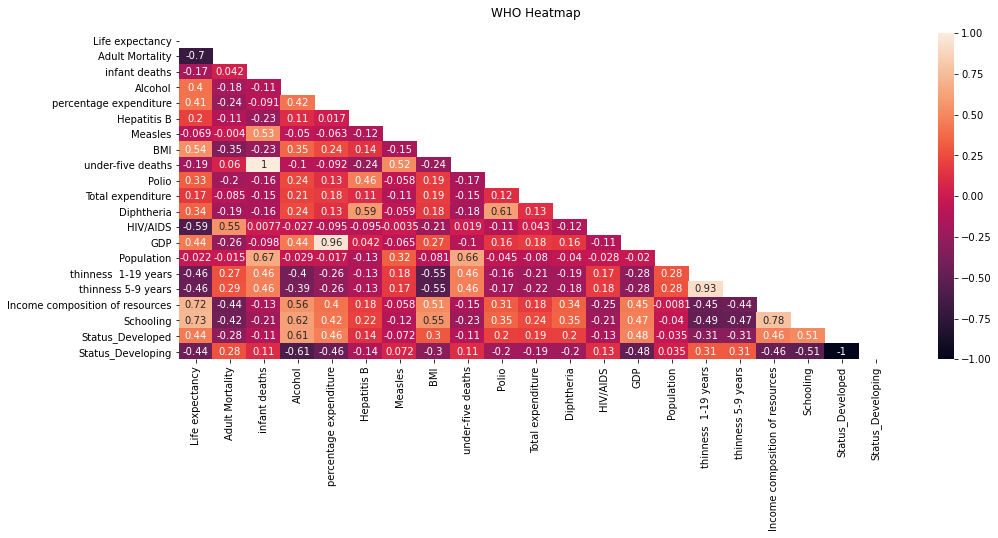

In [855]:
#WHO heatmap
np.triu(np.ones_like(who_df.corr()))
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(who_df.corr(), dtype=np.bool))
who_heatmap = sns.heatmap(who_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
who_heatmap.set_title('WHO Heatmap', fontdict={'fontsize':12}, pad=16);
plt.savefig('who_heatmap.png')

**NB**: Multicollinearity is evident from heatmap.

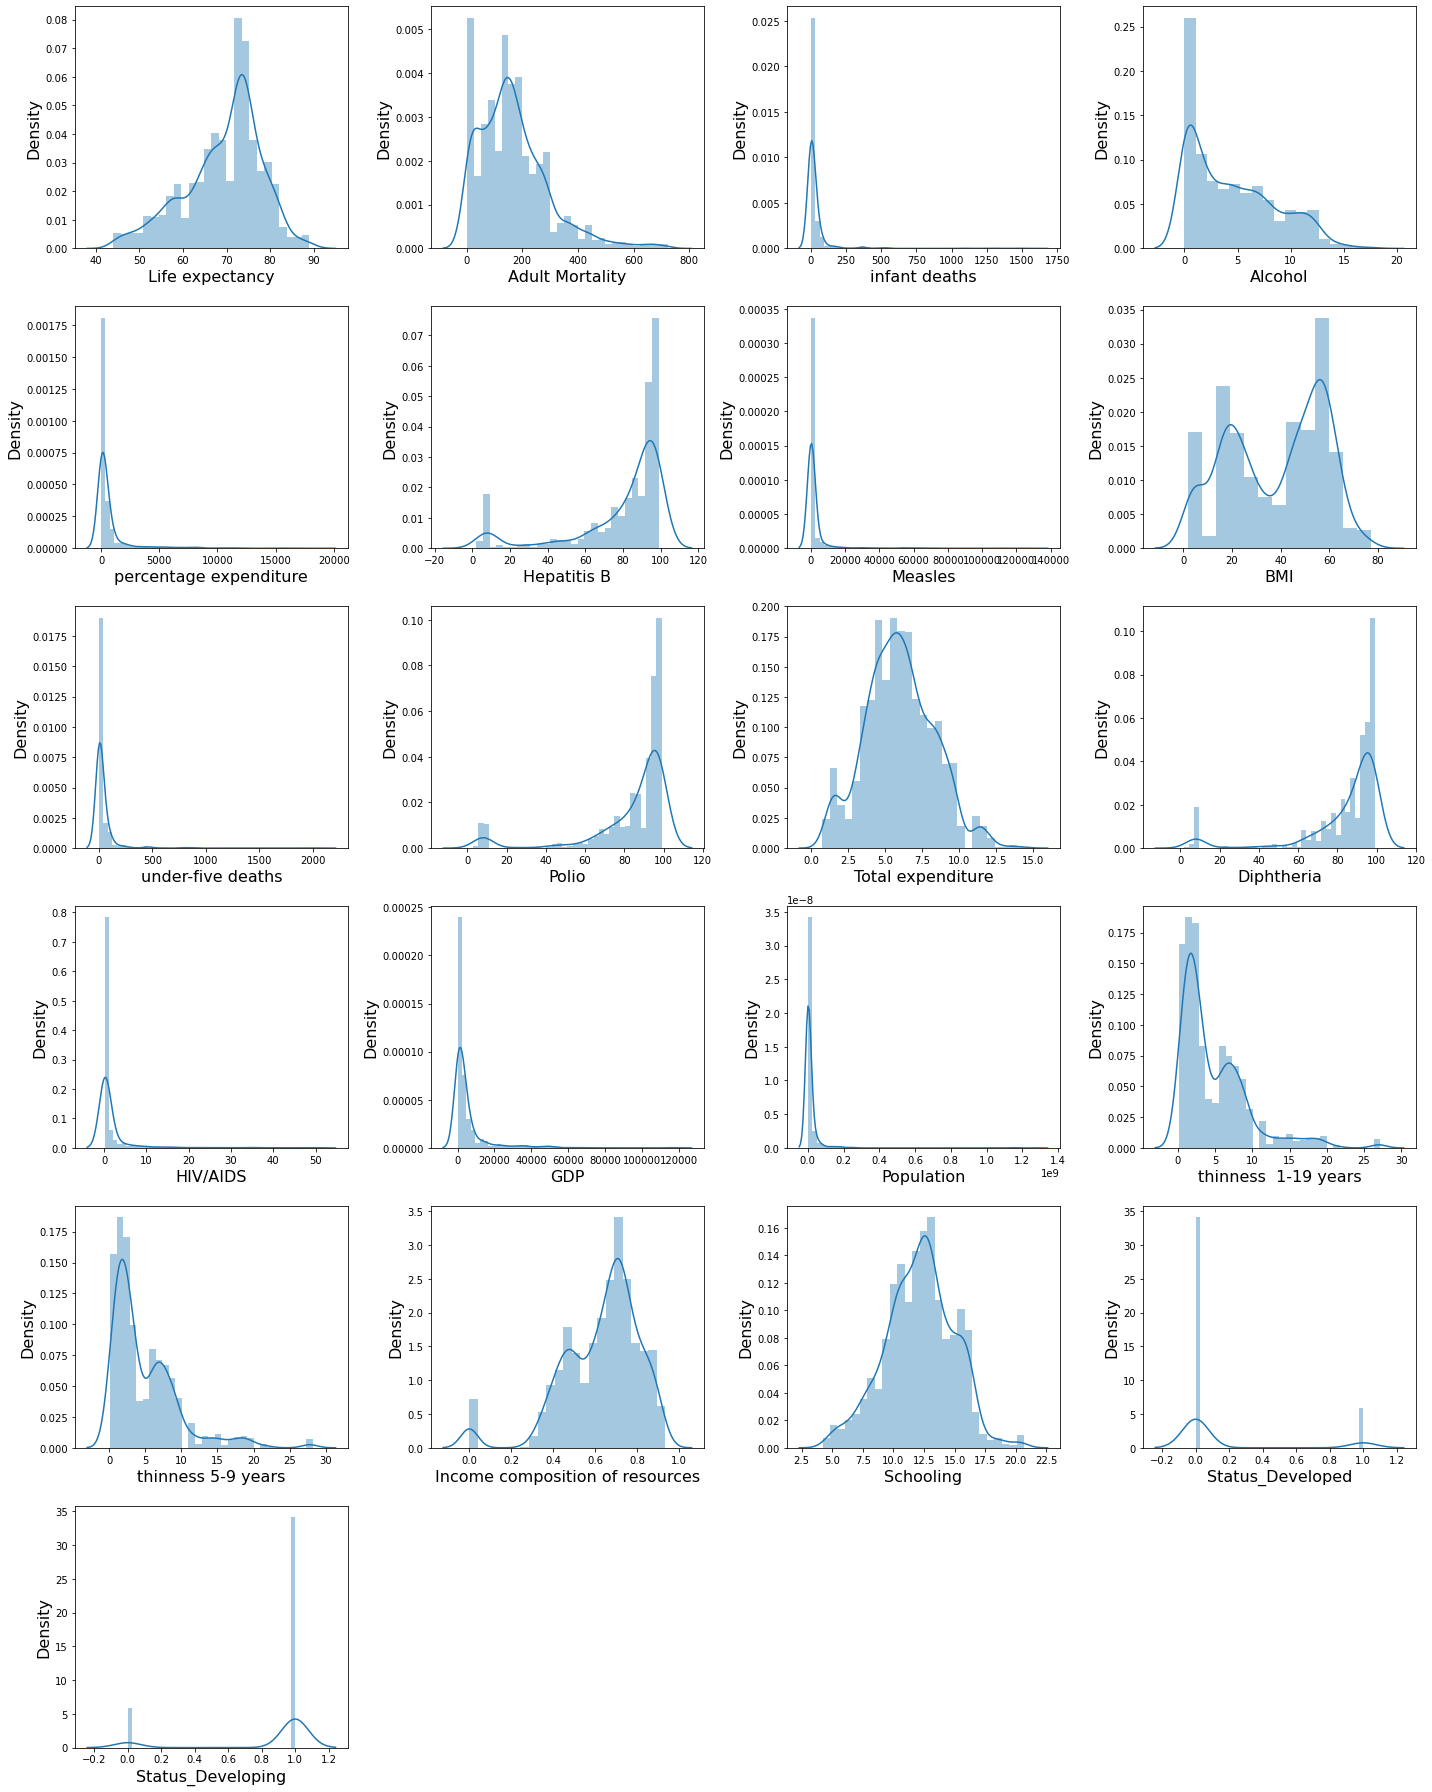

In [856]:
# WHO data distribution
fig4=plt.figure(figsize = (20, 25))
plot = 1

for column in who_df:
    if plot <= len(who_df.columns):
        ax = plt.subplot(6, 4, plot)
        sns.distplot(who_df[column])
        plt.xlabel(column, fontsize = 16)
        plt.ylabel("Density",fontsize = 16)
    plot += 1
    
plt.tight_layout()
plt.show()
fig4.savefig('who_distribution.png')

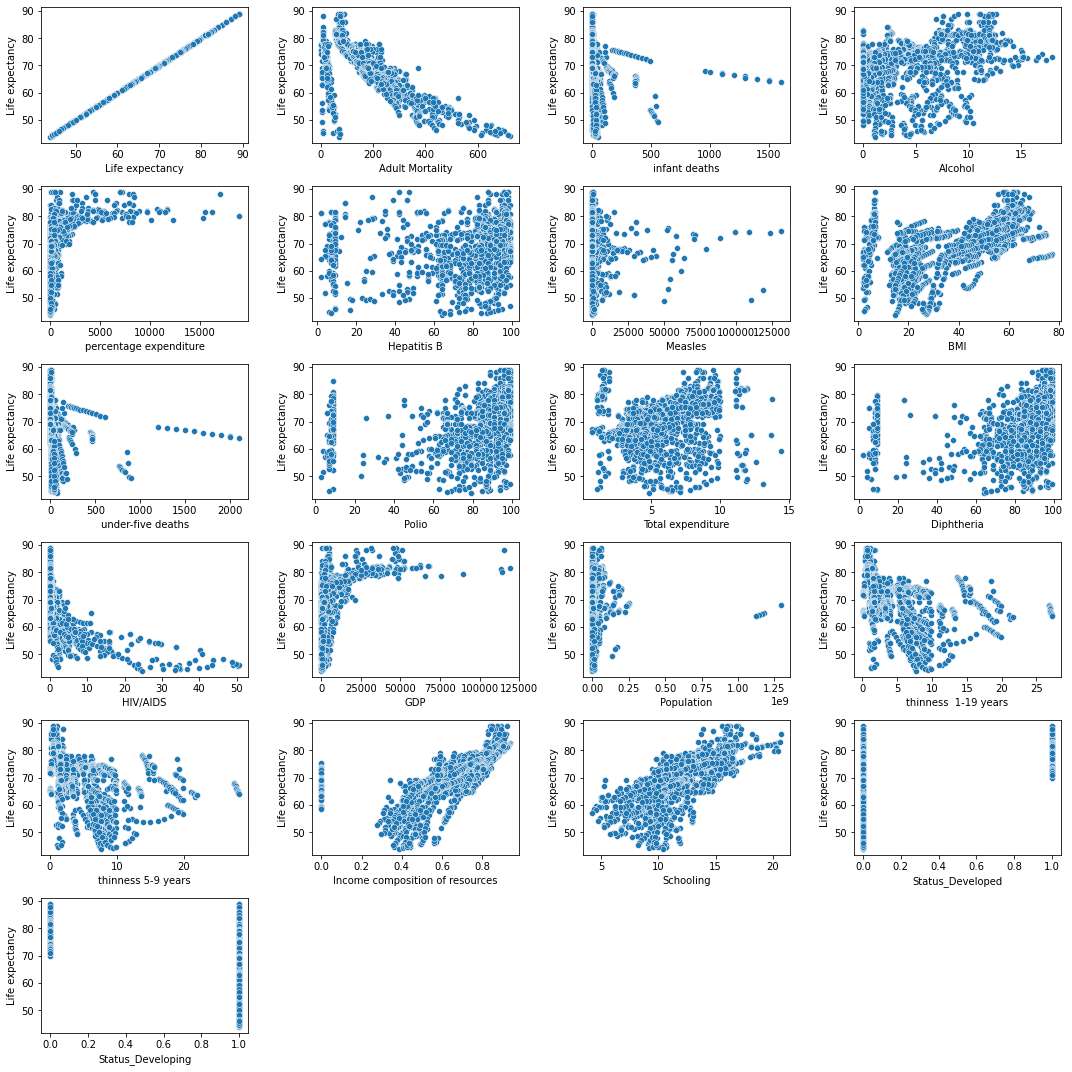

In [857]:
# Plotting `Life expectancy` against other columns
fig5=plt.figure(figsize = (15, 15))
plot = 1

for column in who_df:
    if plot <= len(who_df.columns):
        ax = plt.subplot(6, 4, plot)
        sns.scatterplot(x = who_df[column], y = who_df['Life expectancy'])
    plot += 1

plt.tight_layout()
plt.show()
fig5.savefig('who_depVcorr.png')

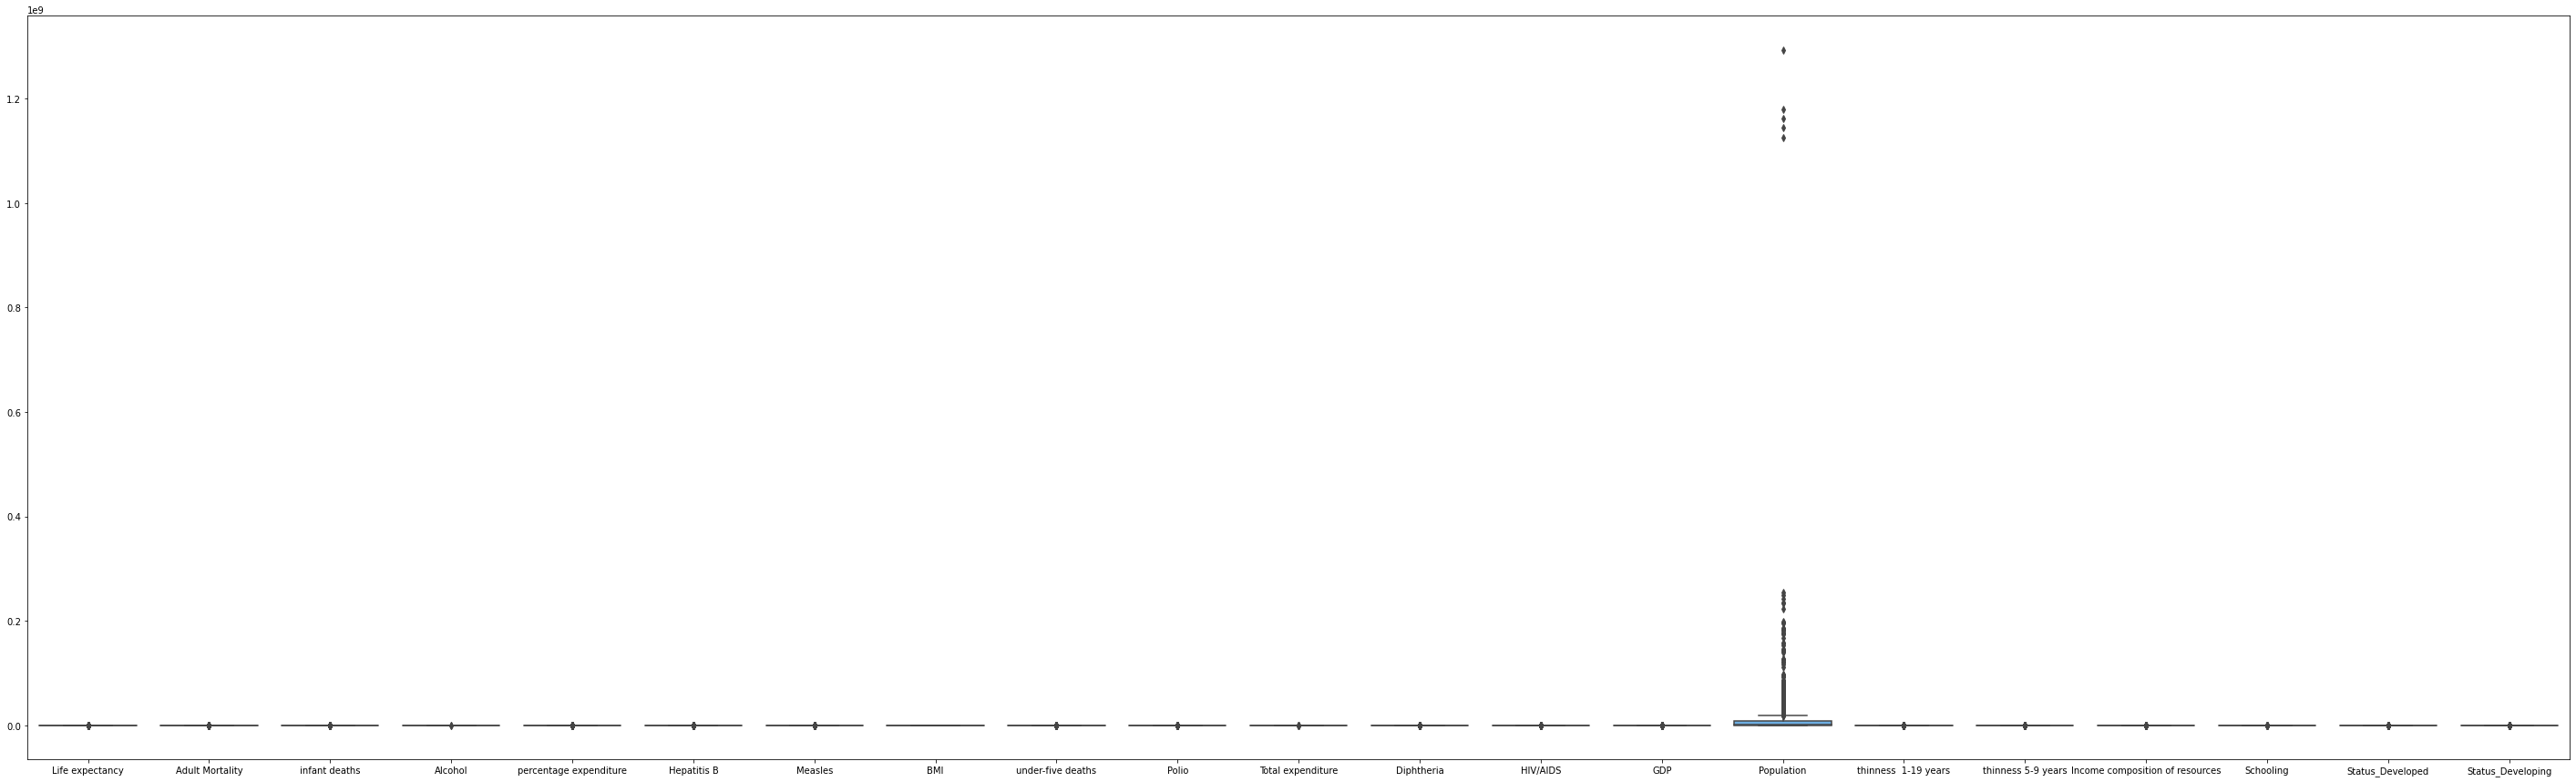

In [858]:
# looking for outliers using box plot
fig6=plt.figure(figsize = (50, 15))
sns.boxplot(data = who_df)
plt.show()
fig6.savefig('who_boxplot')

In [859]:
#set features (independent variables; predictors)
X_features = who_df.drop(['Life expectancy'], axis=1) #20 features (independent variables)

#set target (dependent variable; to be predicted)
y_target = who_df['Life expectancy']  #1 target (dependent variable)

print("Feature shape: ", X_features.shape)
print("Target shape: ", y_target.shape)

Feature shape:  (1649, 20)
Target shape:  (1649,)


In [860]:
calc_vif(X_features) #further highlight multicollinearity with VIF scores

,variables,VIF
0,Adult Mortality,1.812128
1,infant deaths,212.186280
2,Alcohol,2.285766
3,percentage expenditure,12.852460
4,Hepatitis B,1.660937
5,Measles,1.515011
6,BMI,1.797323
7,under-five deaths,202.005452
8,Polio,1.712697
9,Total expenditure,1.119812


In [861]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 96)

In [862]:
X_train #before scaling

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
627,96.0,1,3.42,386.137912,94.0,0,58.5,1,95.0,9.47,95.0,0.1,1569.666310,47641.0,1.7,1.7,0.762,13.7,0,1
279,278.0,25,1.28,7.615430,75.0,928,22.0,39,77.0,4.20,75.0,1.8,82.151350,8696916.0,8.1,8.0,0.444,9.1,0,1
2269,127.0,1,9.56,915.319079,94.0,370,57.7,1,94.0,9.72,94.0,0.1,6423.291783,723499.0,2.2,2.2,0.757,13.5,0,1
55,371.0,84,7.07,249.910196,69.0,265,19.3,133,65.0,3.84,69.0,2.6,3868.578883,2175942.0,9.5,9.4,0.468,8.1,0,1
1563,263.0,36,0.68,38.418704,82.0,2,16.3,54,83.0,5.11,85.0,0.6,292.157443,1888268.0,8.0,7.9,0.478,9.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,187.0,10,1.88,657.528280,73.0,0,49.9,13,65.0,6.20,73.0,0.4,3687.763767,15923559.0,1.2,1.2,0.614,10.7,0,1
578,145.0,11,4.41,15.162555,91.0,1,56.4,13,91.0,6.84,91.0,0.1,83.586300,47342981.0,2.1,1.9,0.712,13.3,0,1
2560,178.0,10,0.32,4.153363,86.0,0,35.3,12,87.0,5.58,86.0,0.3,76.914128,739728.0,3.8,3.8,0.592,10.8,0,1
1679,174.0,0,4.08,407.779262,97.0,777,26.9,0,99.0,4.15,99.0,0.1,4623.347642,121337.0,7.9,7.8,0.687,12.6,0,1


In [863]:
y_train

627     79.4
279     57.6
2269    74.6
55      48.7
1563    61.4
        ... 
1059    71.7
578     74.4
2560    66.4
1679    71.5
118     81.7
Name: Life expectancy, Length: 1319, dtype: float64

# Multiple Linear Regression (WHO Life Expectancy Dataset)

In [864]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Sidenote:** Scaling the entire dataframe vs scaling just the features appears to affect the R2 score and p-values of predictors.

In [865]:
X_train #after scaling

array([[-0.58326273, -0.26209316, -0.27717316, ...,  0.58903534,
        -0.4127515 ,  0.4127515 ],
       [ 0.84884205, -0.05430381, -0.80664284, ..., -1.06295367,
        -0.4127515 ,  0.4127515 ],
       [-0.33933279, -0.26209316,  1.24195948, ...,  0.51720973,
        -0.4127515 ,  0.4127515 ],
       ...,
       [ 0.06197129, -0.18417215, -1.04416194, ..., -0.45243599,
        -0.4127515 ,  0.4127515 ],
       [ 0.03049646, -0.27075105, -0.11387877, ...,  0.19399449,
        -0.4127515 ,  0.4127515 ],
       [-0.81932395, -0.26209316,  1.50422016, ...,  2.5283268 ,
         2.42276529, -2.42276529]])

In [866]:
y_train #not scaled

627     79.4
279     57.6
2269    74.6
55      48.7
1563    61.4
        ... 
1059    71.7
578     74.4
2560    66.4
1679    71.5
118     81.7
Name: Life expectancy, Length: 1319, dtype: float64

In [867]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1319, 20)
(330, 20)
(1319,)
(330,)


In [868]:
#statsmodels ols
X_tn = sm.add_constant(X_train) 
# statsmodels OLS fits and predicts the model using the training data
model_mlr = sm.OLS(y_train, X_tn).fit()
print(model_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     370.6
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:01:10   Log-Likelihood:                -3530.6
No. Observations:                1319   AIC:                             7101.
Df Residuals:                    1299   BIC:                             7205.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.1616      0.098    708.628      0.0

In [869]:
#use the trained OLS model to predict on the test data instead
X_tt = sm.add_constant(X_test)
#Trying out the model on the test data
predictions = model_mlr.predict(X_tt) #predict out of sample
print(f"R2 score: {metrics.r2_score(y_test, predictions)}")
print(f"MSE: {metrics.mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}")

R2 score: 0.7908230947060908
MSE: 14.326204391584879
RMSE: 3.7849972776192162


In [870]:
#scikit-learn LinearRegression
mullinear_regr = LinearRegression()
mullinear_regr.fit(X_train, y_train)
mullinear_regr_predictions = mullinear_regr.predict(X_test)

mullinear_df = pd.DataFrame({
    'Actual Value': y_test,
    'MLR Prediction': mullinear_regr_predictions,
})

print(mullinear_df)
print()

print(f"MLR coefficients: {mullinear_regr.coef_}\n\nMLR intercept {mullinear_regr.intercept_}")
print()
print(f"""MLR train score: {mullinear_regr.score(X_train, y_train)}
\nMLR test score: {mullinear_regr.score(X_test, y_test)}
\nMLR MAE: {metrics.mean_absolute_error(y_test, mullinear_regr_predictions)}
\nMLR MSE: {metrics.mean_squared_error(y_test, mullinear_regr_predictions)}
\nMLR RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mullinear_regr_predictions))}
\nMLR R2 Score: {metrics.r2_score(y_test, mullinear_regr_predictions)}
""")

      Actual Value  MLR Prediction
902           69.2       73.862102
2907          61.1       64.580006
93            74.1       76.844020
604           59.6       56.621489
904           68.9       76.198713
...            ...             ...
2220          66.9       67.538498
296           66.5       59.009662
1446          73.6       76.294518
589           71.8       70.449402
2604          67.4       68.932610

[330 rows x 2 columns]

MLR coefficients: [ -2.15146072  11.23138601  -0.33570121   0.57196409  -0.20593893
  -0.09415332   0.72666407 -11.41022828   0.27758823   0.13185609
   0.30463443  -2.59585209   0.17054527  -0.03145655   0.04645522
  -0.37050366   1.93433417   2.31456605   0.15771051  -0.15771051]

MLR intercept 69.16156178923427

MLR train score: 0.8442613773402001

MLR test score: 0.7908230947060912

MLR MAE: 2.8660847958235727

MLR MSE: 14.326204391584856

MLR RMSE: 3.784997277619213

MLR R2 Score: 0.7908230947060912



In [871]:
# scikit-learn summary: same as statsmodels summary results
params = np.append(mullinear_regr.intercept_,mullinear_regr.coef_)
predictions = mullinear_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})

sk_summary

,Coefficients,std errs,t values,p-values
const,69.1616,9.800000e-02,708.355,0.000
Adult Mortality,-2.1515,1.320000e-01,-16.273,0.000
infant deaths,11.2314,1.351000e+00,8.315,0.000
Alcohol,-0.3357,1.480000e-01,-2.274,0.023
percentage expenditure,0.5720,3.710000e-01,1.542,0.123
Hepatitis B,-0.2059,1.280000e-01,-1.606,0.108
Measles,-0.0942,1.190000e-01,-0.790,0.429
BMI,0.7267,1.280000e-01,5.686,0.000
under-five deaths,-11.4102,1.316000e+00,-8.669,0.000
Polio,0.2776,1.260000e-01,2.203,0.028


**Conclusion**: For the Multiple Linear Regression model, we reject the null hypothesis for
- Adult Mortality (p= 0.000)
- infant deaths (p= 0.000)
- Alcohol (p= 0.023)
- BMI (p= 0.000)
- under-five deaths (p= 0.000)
- Polio (p= 0.028)
- Diphtheria (p= 0.032)
- HIV/AIDS (p= 0.000)
- Income composition of resources (p= 0.000) 
- Schooling (p= 0.000)

In other words, we have faith that there is a relationship between the above predictor(s) and Life Expectancy.

# Retrain model with selected features 'Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Income composition of resources', 'Schooling'

In [872]:
X_selected_features=X_features[['Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'under-five deaths', 'Polio',
                                'Diphtheria', 'HIV/AIDS', 'GDP', 'Income composition of resources', 'Schooling']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,Adult Mortality,infant deaths,Alcohol,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Income composition of resources,Schooling
0,263.0,62,0.01,19.1,83,6.0,65.0,0.1,584.259210,0.479,10.1
1,271.0,64,0.01,18.6,86,58.0,62.0,0.1,612.696514,0.476,10.0
2,268.0,66,0.01,18.1,89,62.0,64.0,0.1,631.744976,0.470,9.9
3,272.0,69,0.01,17.6,93,67.0,67.0,0.1,669.959000,0.463,9.8
4,275.0,71,0.01,17.2,97,68.0,68.0,0.1,63.537231,0.454,9.5


In [873]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [874]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [875]:
mullinear_regr = LinearRegression()
mullinear_regr.fit(X_train_fs, y_train)
mullinear_regr_predictions = mullinear_regr.predict(X_test_fs)

mullinear_df = pd.DataFrame({
    'Actual Value': y_test,
    'MLR Prediction': mullinear_regr_predictions,
})

print(mullinear_df)
print()

print(f"MLR coefficients: {mullinear_regr.coef_}\n\nMLR intercept {mullinear_regr.intercept_}")
print()
print(f"""MLR train score: {mullinear_regr.score(X_train_fs, y_train)}
\nMLR test score: {mullinear_regr.score(X_test_fs, y_test)}
\nMLR MAE: {metrics.mean_absolute_error(y_test, mullinear_regr_predictions)}
\nMLR MSE: {metrics.mean_squared_error(y_test, mullinear_regr_predictions)}
\nMLR RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mullinear_regr_predictions))}
\nMLR R2 Score: {metrics.r2_score(y_test, mullinear_regr_predictions)}
""")

      Actual Value  MLR Prediction
902           69.2       73.996798
2907          61.1       64.450660
93            74.1       76.644761
604           59.6       56.661717
904           68.9       76.615519
...            ...             ...
2220          66.9       67.239972
296           66.5       59.681144
1446          73.6       75.839808
589           71.8       70.387345
2604          67.4       69.498189

[330 rows x 2 columns]

MLR coefficients: [ -2.22360451  10.74575664  -0.12294489   0.82815843 -11.08832886
   0.23475385   0.20146158  -2.61061137   0.82867908   1.94299821
   2.36178862]

MLR intercept 69.16156178923427

MLR train score: 0.8418891405884057

MLR test score: 0.7884671413965315

MLR MAE: 2.817212973990944

MLR MSE: 14.48756000874708

MLR RMSE: 3.806252751558556

MLR R2 Score: 0.7884671413965315



**NB:** With fewer features, RMSE is not as low and R2 score is not as high when compared to model without feature selection. This is to be expected though as more features typically result in a higher R2.

## Multiple Linear Regression: Ridge (L2) Regularisation

In [876]:
ridge_regr = Ridge(alpha=99, random_state=96)
ridge_regr.fit(X_train, y_train)
ridge_regr_predictions = ridge_regr.predict(X_test)

ridge_df = pd.DataFrame({
    'Actual Value': y_test,
    'Ridge Prediction': ridge_regr_predictions,
})

print(ridge_df)
print()

print(f"MLR (L2) coefficients: {ridge_regr.coef_}\n\nRidge intercept {ridge_regr.intercept_}")
print()
print(f"""MLR (L2) train score: {ridge_regr.score(X_train, y_train)}
\nMLR (L2) test score: {ridge_regr.score(X_test, y_test)}
\nMLR (L2) MAE: {metrics.mean_absolute_error(y_test, ridge_regr_predictions)}
\nMLR (L2) MSE: {metrics.mean_squared_error(y_test, ridge_regr_predictions)}
\nMLR (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, ridge_regr_predictions))}
\nMLR (L2) R2 Score: {metrics.r2_score(y_test, ridge_regr_predictions)}
""")

      Actual Value  Ridge Prediction
902           69.2         73.875165
2907          61.1         64.569316
93            74.1         76.312462
604           59.6         55.707995
904           68.9         76.340875
...            ...               ...
2220          66.9         67.609039
296           66.5         58.912628
1446          73.6         76.135293
589           71.8         70.326337
2604          67.4         68.734490

[330 rows x 2 columns]

MLR (L2) coefficients: [-2.24549616  0.22868985 -0.39042793  0.40360412 -0.17477151  0.10623613
  0.78583488 -0.63867983  0.36311917  0.11293806  0.42324598 -2.46465152
  0.34884208  0.23323379 -0.078617   -0.27411697  1.95746092  2.1276254
  0.17280481 -0.17280481]

Ridge intercept 69.16156178923427

MLR (L2) train score: 0.8351423833508169

MLR (L2) test score: 0.7842300195055234

MLR (L2) MAE: 2.9400434177700414

MLR (L2) MSE: 14.77775396757514

MLR (L2) RMSE: 3.844184434646072

MLR (L2) R2 Score: 0.7842300195055234



In [877]:
params = np.append(ridge_regr.intercept_,ridge_regr.coef_)
predictions = ridge_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})

sk_summary

,Coefficients,std errs,t values,p-values
const,69.1616,1.000000e-01,688.485,0.000
Adult Mortality,-2.2455,1.360000e-01,-16.508,0.000
infant deaths,0.2287,1.390000e+00,0.165,0.869
Alcohol,-0.3904,1.520000e-01,-2.571,0.010
percentage expenditure,0.4036,3.820000e-01,1.058,0.290
Hepatitis B,-0.1748,1.320000e-01,-1.325,0.185
Measles,0.1062,1.230000e-01,0.867,0.386
BMI,0.7858,1.310000e-01,5.977,0.000
under-five deaths,-0.6387,1.354000e+00,-0.472,0.637
Polio,0.3631,1.300000e-01,2.801,0.005


**Conclusion**: With L2 regularisation and alpha=99, we reject the null hypothesis for
- Adult Mortality                     0.000  
- Alcohol                             0.010 
- BMI                                 0.000
- Polio                               0.005 
- Diphtheria                          0.004  
- HIV/AIDS                            0.000
- Income composition of resources     0.000  
- Schooling                           0.000  

In other words, we have faith that there is a relationship between the above predictor(s) and Life expectancy.

## Retrain MLR model with selected features 'Adult Mortality', 'Alcohol', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling'

In [878]:
X_selected_features=X_features[['Adult Mortality', 'Alcohol', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS',
                                'Income composition of resources', 'Schooling']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,263.0,0.01,19.1,6.0,65.0,0.1,0.479,10.1
1,271.0,0.01,18.6,58.0,62.0,0.1,0.476,10.0
2,268.0,0.01,18.1,62.0,64.0,0.1,0.470,9.9
3,272.0,0.01,17.6,67.0,67.0,0.1,0.463,9.8
4,275.0,0.01,17.2,68.0,68.0,0.1,0.454,9.5


In [879]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [880]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [881]:
ridge_regr = Ridge(alpha=99, random_state=96)
ridge_regr.fit(X_train_fs, y_train)
ridge_regr_predictions = ridge_regr.predict(X_test_fs)

ridge_df = pd.DataFrame({
    'Actual Value': y_test,
    'Ridge Prediction': ridge_regr_predictions,
})

print(ridge_df)
print()

print(f"MLR (L2) coefficients: {ridge_regr.coef_}\n\nRidge intercept {ridge_regr.intercept_}")
print()
print(f"""MLR (L2) train score: {ridge_regr.score(X_train_fs, y_train)}
\nMLR (L2) test score: {ridge_regr.score(X_test_fs, y_test)}
\nMLR (L2) MAE: {metrics.mean_absolute_error(y_test, ridge_regr_predictions)}
\nMLR (L2) MSE: {metrics.mean_squared_error(y_test, ridge_regr_predictions)}
\nMLR (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, ridge_regr_predictions))}
\nMLR (L2) R2 Score: {metrics.r2_score(y_test, ridge_regr_predictions)}
""")

      Actual Value  Ridge Prediction
902           69.2         74.188272
2907          61.1         64.553906
93            74.1         76.998433
604           59.6         54.904583
904           68.9         77.115474
...            ...               ...
2220          66.9         67.369751
296           66.5         59.036329
1446          73.6         76.519809
589           71.8         70.329040
2604          67.4         69.399526

[330 rows x 2 columns]

MLR (L2) coefficients: [-2.36995903 -0.03070208  0.91869253  0.34493606  0.37549324 -2.46534513
  2.10923674  2.39601382]

Ridge intercept 69.16156178923427

MLR (L2) train score: 0.8247892354207014

MLR (L2) test score: 0.77558823324386

MLR (L2) MAE: 2.9195099275547434

MLR (L2) MSE: 15.369616611871491

MLR (L2) RMSE: 3.9204102606578677

MLR (L2) R2 Score: 0.77558823324386



**NB:** With fewer features, RMSE is not as low and R2 score is not as high when compared to model without feature selection. This is to be expected though as more features typically result in a higher R2.

### L2 regularisation with cross validation

In [882]:
alphas = np.arange(0,100,1)
ridge_regr_cv = RidgeCV(alphas=alphas, cv=3) #3-fold cross validation
ridge_regr_cv.fit(X_train, y_train)

#best alpha parameter
best_alpha = ridge_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

ridge_regr = Ridge(alpha=best_alpha, random_state=96)
ridge_regr.fit(X_train, y_train)
ridge_regr_predictions = ridge_regr.predict(X_test)

ridge_df = pd.DataFrame({
    'Actual Value': y_test,
    'Ridge Prediction': ridge_regr_predictions,
})

print(ridge_df)
print()

print(f"MLR (L2_CV) coefficients: {ridge_regr.coef_}\n\nRidge intercept {ridge_regr.intercept_}")
print()

print(f"""MLR (L2_CV) train score: {ridge_regr.score(X_train, y_train)}
\nMLR (L2_CV) test score: {ridge_regr.score(X_test, y_test)}
\nMLR (L2_CV) MAE: {metrics.mean_absolute_error(y_test, ridge_regr_predictions)}
\nMLR (L2_CV) MSE: {metrics.mean_squared_error(y_test, ridge_regr_predictions)}
\nMLR (L2_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, ridge_regr_predictions))}
\nMLR (L2_CV) R2 Score: {metrics.r2_score(y_test, ridge_regr_predictions)}
""")

The best alpha is: 0
      Actual Value  Ridge Prediction
902           69.2         73.862102
2907          61.1         64.580006
93            74.1         76.844020
604           59.6         56.621489
904           68.9         76.198713
...            ...               ...
2220          66.9         67.538498
296           66.5         59.009662
1446          73.6         76.294518
589           71.8         70.449402
2604          67.4         68.932610

[330 rows x 2 columns]

MLR (L2_CV) coefficients: [ -2.15146072  11.23138601  -0.33570121   0.57196409  -0.20593893
  -0.09415332   0.72666407 -11.41022828   0.27758823   0.13185609
   0.30463443  -2.59585209   0.17054527  -0.03145655   0.04645522
  -0.37050366   1.93433417   2.31456605  -0.43457899  -0.75      ]

Ridge intercept 69.16156178923427

MLR (L2_CV) train score: 0.8442613773402001

MLR (L2_CV) test score: 0.7908230947060915

MLR (L2_CV) MAE: 2.8660847958235705

MLR (L2_CV) MSE: 14.326204391584834

MLR (L2_CV) RMSE: 3.

In [883]:
#sklearn summary for Multiple Linear Regression: L2 regularisation with CV
params = np.append(ridge_regr.intercept_,ridge_regr.coef_)
predictions = ridge_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})

sk_summary

,Coefficients,std errs,t values,p-values
const,69.1616,9.800000e-02,708.355,0.000
Adult Mortality,-2.1515,1.320000e-01,-16.273,0.000
infant deaths,11.2314,1.351000e+00,8.315,0.000
Alcohol,-0.3357,1.480000e-01,-2.274,0.023
percentage expenditure,0.5720,3.710000e-01,1.542,0.123
Hepatitis B,-0.2059,1.280000e-01,-1.606,0.108
Measles,-0.0942,1.190000e-01,-0.790,0.429
BMI,0.7267,1.280000e-01,5.686,0.000
under-five deaths,-11.4102,1.316000e+00,-8.669,0.000
Polio,0.2776,1.260000e-01,2.203,0.028


**Conclusion**: For L2 regularisation with cross validation, we reject the null hypothesis for
- Adult Mortality (p= 0.000)
- infant deaths (p= 0.000)
- Alcohol (p= 0.023)
- BMI (p= 0.000)
- under-five deaths (p= 0.000)
- Polio (p= 0.028)
- Diphtheria (p= 0.032)
- HIV/AIDS (p= 0.000)
- Income composition of resources (p= 0.000)
- Schooling (p= 0.000)

In other words, we have faith that there is a relationship between the above predictor(s) and Life expectancy.

### L2 regularisation with feature selection 'Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling'  AND cross validation

In [884]:
X_selected_features=X_features[['Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'under-five deaths', 'Polio', 
                                'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,Adult Mortality,infant deaths,Alcohol,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,263.0,62,0.01,19.1,83,6.0,65.0,0.1,0.479,10.1
1,271.0,64,0.01,18.6,86,58.0,62.0,0.1,0.476,10.0
2,268.0,66,0.01,18.1,89,62.0,64.0,0.1,0.470,9.9
3,272.0,69,0.01,17.6,93,67.0,67.0,0.1,0.463,9.8
4,275.0,71,0.01,17.2,97,68.0,68.0,0.1,0.454,9.5


In [885]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [886]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [887]:
alphas = np.arange(0,100,1)
ridge_regr_cv = RidgeCV(alphas=alphas, cv=3) #3-fold cross validation
ridge_regr_cv.fit(X_train_fs, y_train)

#best alpha parameter
best_alpha = ridge_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

ridge_regr = Ridge(alpha=best_alpha, random_state=96)
ridge_regr.fit(X_train_fs, y_train)
ridge_regr_predictions = ridge_regr.predict(X_test_fs)

ridge_df = pd.DataFrame({
    'Actual Value': y_test,
    'Ridge Prediction': ridge_regr_predictions,
})

print(ridge_df)
print()

print(f"MLR (L2_CV) coefficients: {ridge_regr.coef_}\n\nRidge intercept {ridge_regr.intercept_}")
print()

print(f"""MLR (L2_CV) train score: {ridge_regr.score(X_train_fs, y_train)}
\nMLR (L2_CV) test score: {ridge_regr.score(X_test_fs, y_test)}
\nMLR (L2_CV) MAE: {metrics.mean_absolute_error(y_test, ridge_regr_predictions)}
\nMLR (L2_CV) MSE: {metrics.mean_squared_error(y_test, ridge_regr_predictions)}
\nMLR (L2_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, ridge_regr_predictions))}
\nMLR (L2_CV) R2 Score: {metrics.r2_score(y_test, ridge_regr_predictions)}
""")

The best alpha is: 0
      Actual Value  Ridge Prediction
902           69.2         74.005398
2907          61.1         64.436300
93            74.1         77.310348
604           59.6         56.241686
904           68.9         76.891926
...            ...               ...
2220          66.9         67.276669
296           66.5         59.155313
1446          73.6         76.677313
589           71.8         70.578056
2604          67.4         69.655336

[330 rows x 2 columns]

MLR (L2_CV) coefficients: [ -2.30081803  10.51356998   0.06087355   0.79789737 -10.87121329
   0.22454646   0.18977148  -2.59626502   2.07704117   2.51014014]

Ridge intercept 69.16156178923427

MLR (L2_CV) train score: 0.8354476596483381

MLR (L2_CV) test score: 0.7814974399401526

MLR (L2_CV) MAE: 2.8644582776416168

MLR (L2_CV) MSE: 14.964904137498365

MLR (L2_CV) RMSE: 3.868449836497607

MLR (L2_CV) R2 Score: 0.7814974399401526



**NB:** RMSE is still lower and R2 score is still higher for L2 model with cross validation AND no feature selection, but this shouldn't come as a surprise as more features naturally increase R2 score.

## Multiple Linear Regression: Lasso (L1) Regularisation

In [888]:
lasso_regr = Lasso(alpha=0.1, random_state=96)
lasso_regr.fit(X_train, y_train)
lasso_regr_predictions = lasso_regr.predict(X_test)

lasso_df = pd.DataFrame({
    'Actual Value': y_test,
    'Lasso Prediction': lasso_regr_predictions,
})

print(lasso_df)
print()

print(f"MLR (L1) coefficients: {lasso_regr.coef_}\n\Lasso intercept {lasso_regr.intercept_}")
print()
print(f"""MLR (L1) train score: {lasso_regr.score(X_train, y_train)}
\nMLR (L1) test score: {lasso_regr.score(X_test, y_test)}
\nMLR (L1) MAE: {metrics.mean_absolute_error(y_test, lasso_regr_predictions)}
\nMLR (L1) MSE: {metrics.mean_squared_error(y_test, lasso_regr_predictions)}
\nMLR (L1) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lasso_regr_predictions))}
\nMLR (L1) R2 Score: {metrics.r2_score(y_test, lasso_regr_predictions)}
""")

      Actual Value  Lasso Prediction
902           69.2         73.829082
2907          61.1         64.581175
93            74.1         76.531766
604           59.6         55.962616
904           68.9         76.564349
...            ...               ...
2220          66.9         67.348506
296           66.5         58.983415
1446          73.6         76.071690
589           71.8         70.235054
2604          67.4         69.199811

[330 rows x 2 columns]

MLR (L1) coefficients: [-2.34491756 -0.         -0.15761343  0.49184444 -0.          0.
  0.69868781 -0.20595866  0.26905625  0.02065584  0.2814805  -2.54688324
  0.17278325  0.01277139 -0.         -0.2186453   1.99462351  2.31880627
  0.11914305 -0.        ]
\Lasso intercept 69.16156178923427

MLR (L1) train score: 0.8334974882965399

MLR (L1) test score: 0.7855361898272724

MLR (L1) MAE: 2.8691834164428345

MLR (L1) MSE: 14.688296371989694

MLR (L1) RMSE: 3.8325313269417243

MLR (L1) R2 Score: 0.7855361898272724



In [889]:
params = np.append(lasso_regr.intercept_,lasso_regr.coef_)
predictions = lasso_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})

sk_summary

,Coefficients,std errs,t values,p-values
const,69.1616,1.010000e-01,685.076,0.000
Adult Mortality,-2.3449,1.370000e-01,-17.153,0.000
infant deaths,-0.0000,1.397000e+00,-0.000,1.000
Alcohol,-0.1576,1.530000e-01,-1.033,0.302
percentage expenditure,0.4918,3.830000e-01,1.283,0.200
Hepatitis B,-0.0000,1.330000e-01,-0.000,1.000
Measles,0.0000,1.230000e-01,0.000,1.000
BMI,0.6987,1.320000e-01,5.288,0.000
under-five deaths,-0.2060,1.361000e+00,-0.151,0.880
Polio,0.2691,1.300000e-01,2.065,0.039


**Conclusion**: With L1 regularisation and alpha=0.1, we reject the null hypothesis for
- Adult Mortality                     0.000 
- BMI                                 0.000
- Polio                               0.039
- HIV/AIDS                            0.000
- Income composition of resources     0.000  
- Schooling                           0.000

In other words, we have faith that there is a relationship between the above predictor(s) and Life Expectancy.

### Retrain MLR model with selected features 'Adult Mortality', 'BMI', 'Polio', 'HIV/AIDS', 'Income composition of resources', 'Schooling'

In [890]:
X_selected_features=X_features[['Adult Mortality', 'BMI', 'Polio', 'HIV/AIDS', 'Income composition of resources', 
                                'Schooling']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,Adult Mortality,BMI,Polio,HIV/AIDS,Income composition of resources,Schooling
0,263.0,19.1,6.0,0.1,0.479,10.1
1,271.0,18.6,58.0,0.1,0.476,10.0
2,268.0,18.1,62.0,0.1,0.470,9.9
3,272.0,17.6,67.0,0.1,0.463,9.8
4,275.0,17.2,68.0,0.1,0.454,9.5


In [891]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [892]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [893]:
lasso_regr = Lasso(alpha=0.1, random_state=96)
lasso_regr.fit(X_train_fs, y_train)
lasso_regr_predictions = lasso_regr.predict(X_test_fs)

lasso_df = pd.DataFrame({
    'Actual Value': y_test,
    'Lasso Prediction': lasso_regr_predictions,
})

print(lasso_df)
print()

print(f"MLR (L2) coefficients: {lasso_regr.coef_}\n\nLasso intercept {lasso_regr.intercept_}")
print()
print(f"""MLR (L2) train score: {lasso_regr.score(X_train_fs, y_train)}
\nMLR (L2) test score: {lasso_regr.score(X_test_fs, y_test)}
\nMLR (L2) MAE: {metrics.mean_absolute_error(y_test, lasso_regr_predictions)}
\nMLR (L2) MSE: {metrics.mean_squared_error(y_test, lasso_regr_predictions)}
\nMLR (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lasso_regr_predictions))}
\nMLR (L2) R2 Score: {metrics.r2_score(y_test, lasso_regr_predictions)}
""")

      Actual Value  Lasso Prediction
902           69.2         74.005130
2907          61.1         64.508149
93            74.1         77.120241
604           59.6         55.772553
904           68.9         77.001648
...            ...               ...
2220          66.9         67.155762
296           66.5         58.772039
1446          73.6         76.603131
589           71.8         70.305532
2604          67.4         69.579498

[330 rows x 2 columns]

MLR (L2) coefficients: [-2.41051064  0.78872306  0.42613576 -2.54780254  2.13230789  2.57597388]

Lasso intercept 69.16156178923427

MLR (L2) train score: 0.8242961634472321

MLR (L2) test score: 0.775720864418553

MLR (L2) MAE: 2.918756153580002

MLR (L2) MSE: 15.360532906790953

MLR (L2) RMSE: 3.9192515748278973

MLR (L2) R2 Score: 0.775720864418553



**NB:** RMSE is still lower and R2 score is still higher for L1 model with no feature selection but this shouldn't come as a surprise as more features naturally increase R2 score.

### L1 regularisation with cross validation

In [894]:
alphas = np.arange(0,0.2,0.01)
lasso_regr_cv = LassoCV(alphas=alphas, cv=3)
lasso_regr_cv.fit(X_train, y_train)

#best alpha parameter
best_alpha = lasso_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

lasso_regr = Lasso(alpha=best_alpha, random_state=96)
lasso_regr.fit(X_train, y_train)
lasso_regr_predictions = lasso_regr.predict(X_test)

lasso_df = pd.DataFrame({
    'Actual Value': y_test,
    'Lasso Prediction': lasso_regr_predictions,
})

print(lasso_df)
print()

print(f"MLR (L1_CV) coefficients: {lasso_regr.coef_}\n\nLasso intercept {lasso_regr.intercept_}")
print()

print(f"""MLR (L1_CV) train score: {lasso_regr.score(X_train, y_train)}
\nMLR (L1_CV) test score: {lasso_regr.score(X_test, y_test)}
\nMLR (L1_CV) MAE: {metrics.mean_absolute_error(y_test, lasso_regr_predictions)}
\nMLR (L1_CV) MSE: {metrics.mean_squared_error(y_test, lasso_regr_predictions)}
\nMLR (L1_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lasso_regr_predictions))}
\nMLR (L1_CV) R2 Score: {metrics.r2_score(y_test, lasso_regr_predictions)}
""")

The best alpha is: 0.0
      Actual Value  Lasso Prediction
902           69.2         73.863935
2907          61.1         64.580612
93            74.1         76.843028
604           59.6         56.616805
904           68.9         76.200874
...            ...               ...
2220          66.9         67.539279
296           66.5         59.009496
1446          73.6         76.294148
589           71.8         70.448932
2604          67.4         68.933817

[330 rows x 2 columns]

MLR (L1_CV) coefficients: [-2.15209487e+00  1.11784615e+01 -3.36583071e-01  5.72251903e-01
 -2.05942156e-01 -9.31087986e-02  7.26852944e-01 -1.13589360e+01
  2.77886600e-01  1.31774305e-01  3.05148829e-01 -2.59586233e+00
  1.70177145e-01 -2.99618856e-02  4.67465880e-02 -3.70353293e-01
  1.93486494e+00  2.31479503e+00  3.15396530e-01  5.02605286e-15]

Lasso intercept 69.16156178923427

MLR (L1_CV) train score: 0.8442611925319699

MLR (L1_CV) test score: 0.7908360145931154

MLR (L1_CV) MAE: 2.866109481431

In [895]:
#summary
params = np.append(lasso_regr.intercept_,lasso_regr.coef_)
predictions = lasso_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})

sk_summary

,Coefficients,std errs,t values,p-values
const,69.1616,9.800000e-02,708.354,0.000
Adult Mortality,-2.1521,1.320000e-01,-16.278,0.000
infant deaths,11.1785,1.351000e+00,8.276,0.000
Alcohol,-0.3366,1.480000e-01,-2.280,0.023
percentage expenditure,0.5723,3.710000e-01,1.543,0.123
Hepatitis B,-0.2059,1.280000e-01,-1.606,0.108
Measles,-0.0931,1.190000e-01,-0.782,0.435
BMI,0.7269,1.280000e-01,5.688,0.000
under-five deaths,-11.3589,1.316000e+00,-8.630,0.000
Polio,0.2779,1.260000e-01,2.205,0.028


**Conclusion**: For L1 regularisation with cross validation, we reject the null hypothesis for
- Adult Mortality                     0.000 
- infant deaths                       0.000 
- Alcohol                             0.023 
- BMI                                 0.000
- under-five deaths                   0.000 
- Polio                               0.028
- Diphtheria                          0.031
- HIV/AIDS                            0.000
- Income composition of resources     0.000  
- Schooling                           0.000

In other words, we have faith that there is a relationship between the above predictor(s) and Life expectancy.

### L1 regularisation with feature selection 'Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling' AND cross validation

In [896]:
X_selected_features=X_features[['Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'under-five deaths', 'Polio', 
                                'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,Adult Mortality,infant deaths,Alcohol,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,263.0,62,0.01,19.1,83,6.0,65.0,0.1,0.479,10.1
1,271.0,64,0.01,18.6,86,58.0,62.0,0.1,0.476,10.0
2,268.0,66,0.01,18.1,89,62.0,64.0,0.1,0.470,9.9
3,272.0,69,0.01,17.6,93,67.0,67.0,0.1,0.463,9.8
4,275.0,71,0.01,17.2,97,68.0,68.0,0.1,0.454,9.5


In [897]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [898]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [899]:
alphas = np.arange(0,0.2,0.01)
lasso_regr_cv = LassoCV(alphas=alphas, cv=3)
lasso_regr_cv.fit(X_train_fs, y_train)

#best alpha parameter
best_alpha = lasso_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

lasso_regr = Lasso(alpha=best_alpha, random_state=96)
lasso_regr.fit(X_train_fs, y_train)
lasso_regr_predictions = lasso_regr.predict(X_test_fs)

lasso_df = pd.DataFrame({
    'Actual Value': y_test,
    'Lasso Prediction': lasso_regr_predictions,
})

print(lasso_df)
print()

print(f"MLR (L1_CV) coefficients: {lasso_regr.coef_}\n\nLasso intercept {lasso_regr.intercept_}")
print()

print(f"""MLR (L1_CV) train score: {lasso_regr.score(X_train_fs, y_train)}
\nMLR (L1_CV) test score: {lasso_regr.score(X_test_fs, y_test)}
\nMLR (L1_CV) MAE: {metrics.mean_absolute_error(y_test, lasso_regr_predictions)}
\nMLR (L1_CV) MSE: {metrics.mean_squared_error(y_test, lasso_regr_predictions)}
\nMLR (L1_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lasso_regr_predictions))}
\nMLR (L1_CV) R2 Score: {metrics.r2_score(y_test, lasso_regr_predictions)}
""")

The best alpha is: 0.0
      Actual Value  Lasso Prediction
902           69.2         74.006506
2907          61.1         64.436905
93            74.1         77.310019
604           59.6         56.238982
904           68.9         76.893152
...            ...               ...
2220          66.9         67.277249
296           66.5         59.154759
1446          73.6         76.677157
589           71.8         70.577484
2604          67.4         69.655746

[330 rows x 2 columns]

MLR (L1_CV) coefficients: [ -2.30114748  10.4863964    0.06032159   0.79793036 -10.84399405
   0.22472802   0.19008202  -2.59626109   2.07731955   2.51026616]

Lasso intercept 69.16156178923427

MLR (L1_CV) train score: 0.8354476037948159

MLR (L1_CV) test score: 0.7815090498939159

MLR (L1_CV) MAE: 2.864455545599349

MLR (L1_CV) MSE: 14.964108989628876

MLR (L1_CV) RMSE: 3.8683470616826607

MLR (L1_CV) R2 Score: 0.7815090498939159



**NB:** RMSE is still lower and R2 score is still higher for L2 model with cross validation AND no feature selection, but this shouldn't come as a surprise as more features naturally increase R2 score.

## Multiple Linear Regression: Elastic Net (L1L2) Regularisation

In [900]:
en_regr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=96)
en_regr.fit(X_train, y_train)
en_regr_predictions = en_regr.predict(X_test)

en_df = pd.DataFrame({
    'Actual Value': y_test,
    'Elastic Net Prediction': en_regr_predictions,
})

print(en_df)
print()

print(f"MLR (L1L2) coefficients: {en_regr.coef_}\n\nElastic Net intercept {en_regr.intercept_}")
print()
print(f"""MLR (L1L2) train score: {en_regr.score(X_train, y_train)}
\nMLR (L1L2) test score: {en_regr.score(X_test, y_test)}
\nMLR (L1L2) MAE: {metrics.mean_absolute_error(y_test, en_regr_predictions)}
\nMLR (L1L2) MSE: {metrics.mean_squared_error(y_test, en_regr_predictions)}
\nMLR (L1L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, en_regr_predictions))}
\nMLR (L1L2) R2 Score: {metrics.r2_score(y_test, en_regr_predictions)}
""")

      Actual Value  Elastic Net Prediction
902           69.2               73.812483
2907          61.1               64.563178
93            74.1               76.328059
604           59.6               55.835418
904           68.9               76.418623
...            ...                     ...
2220          66.9               67.484182
296           66.5               58.960010
1446          73.6               76.093679
589           71.8               70.291594
2604          67.4               68.917389

[330 rows x 2 columns]

MLR (L1L2) coefficients: [-2.28799841  0.         -0.2601398   0.40231078 -0.05868498  0.03354131
  0.75079762 -0.32001177  0.31525295  0.06584578  0.3466965  -2.48246095
  0.31374618  0.14415862 -0.01745337 -0.27478499  1.96969931  2.17442662
  0.12417747 -0.11990861]

Elastic Net intercept 69.16156178923427

MLR (L1L2) train score: 0.8343042084939811

MLR (L1L2) test score: 0.7850409841771783

MLR (L1L2) MAE: 2.9016128780189683

MLR (L1L2) MSE: 14.72221

In [901]:
#sklearn summary
params = np.append(en_regr.intercept_,en_regr.coef_)
predictions = en_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})

sk_summary

,Coefficients,std errs,t values,p-values
const,69.1616,1.010000e-01,686.741,0.000
Adult Mortality,-2.2880,1.360000e-01,-16.778,0.000
infant deaths,0.0000,1.393000e+00,0.000,1.000
Alcohol,-0.2601,1.520000e-01,-1.709,0.088
percentage expenditure,0.4023,3.830000e-01,1.052,0.293
Hepatitis B,-0.0587,1.320000e-01,-0.444,0.657
Measles,0.0335,1.230000e-01,0.273,0.785
BMI,0.7508,1.320000e-01,5.696,0.000
under-five deaths,-0.3200,1.358000e+00,-0.236,0.814
Polio,0.3153,1.300000e-01,2.425,0.015


**Conclusion**: With L1L2 regularisation with alpha=0.1 and l1_ratio =0.5, we reject the null hypothesis for
- Adult Mortality                     0.000 
- BMI                                 0.000  
- Polio                               0.015
- Diphtheria                          0.018  
- HIV/AIDS                            0.000
- Income composition of resources     0.000  
- Schooling                           0.000

In other words, we have faith that there is a relationship between the above predictor(s) and Life expectancy.

### Retrain MLR model with selected features 'Adult Mortality', 'BMI',  'Polio', 'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling'

In [902]:
X_selected_features=X_features[['Adult Mortality', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 
                                'Income composition of resources', 'Schooling']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,Adult Mortality,BMI,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,263.0,19.1,6.0,65.0,0.1,0.479,10.1
1,271.0,18.6,58.0,62.0,0.1,0.476,10.0
2,268.0,18.1,62.0,64.0,0.1,0.470,9.9
3,272.0,17.6,67.0,67.0,0.1,0.463,9.8
4,275.0,17.2,68.0,68.0,0.1,0.454,9.5


In [903]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [904]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [905]:
en_regr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=96)
en_regr.fit(X_train_fs, y_train)
en_regr_predictions = en_regr.predict(X_test_fs)

en_df = pd.DataFrame({
    'Actual Value': y_test,
    'Elastic Net Prediction': en_regr_predictions,
})

print(en_df)
print()

print(f"MLR (L1L2) coefficients: {en_regr.coef_}\n\nElastic Net intercept {en_regr.intercept_}")
print()
print(f"""MLR (L1L2) train score: {en_regr.score(X_train_fs, y_train)}
\nMLR (L1L2) test score: {en_regr.score(X_test_fs, y_test)}
\nMLR (L1L2) MAE: {metrics.mean_absolute_error(y_test, en_regr_predictions)}
\nMLR (L1L2) MSE: {metrics.mean_squared_error(y_test, en_regr_predictions)}
\nMLR (L1L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, en_regr_predictions))}
\nMLR (L1L2) R2 Score: {metrics.r2_score(y_test, en_regr_predictions)}
""")

      Actual Value  Elastic Net Prediction
902           69.2               74.088435
2907          61.1               64.547360
93            74.1               77.006882
604           59.6               55.124428
904           68.9               77.051472
...            ...                     ...
2220          66.9               67.309518
296           66.5               59.014209
1446          73.6               76.530283
589           71.8               70.307061
2604          67.4               69.428811

[330 rows x 2 columns]

MLR (L1L2) coefficients: [-2.38242548  0.87279273  0.31244126  0.34308923 -2.47966252  2.10309188
  2.42894398]

Elastic Net intercept 69.16156178923427

MLR (L1L2) train score: 0.8248500362939345

MLR (L1L2) test score: 0.7764585309639159

MLR (L1L2) MAE: 2.912309960454542

MLR (L1L2) MSE: 15.310011260116555

MLR (L1L2) RMSE: 3.9128009481848878

MLR (L1L2) R2 Score: 0.7764585309639159



**NB:** RMSE is still lower and R2 score is still higher for L1L2 model with no feature selection but this shouldn't come as a surprise as more features naturally increase R2 score.

### L1L2 regularisation with cross validation

In [906]:
alphas = np.arange(0,0.2,0.01)
en_regr_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=3)
en_regr_cv.fit(X_train, y_train)

#best alpha parameter
best_alpha = en_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

en_regr = ElasticNet(alpha=best_alpha, random_state=96)
en_regr.fit(X_train, y_train)
en_regr_predictions = en_regr.predict(X_test)

en_df = pd.DataFrame({
    'Actual Value': y_test,
    'ElasticNet Prediction': en_regr_predictions,
})

print(en_df)
print()

print(f"MLR (L1L2_CV) coefficients: {en_regr.coef_}\n\nElasticNet intercept {en_regr.intercept_}")
print()

print(f"""MLR (L1L2_CV) train score: {en_regr.score(X_train, y_train)}
\nMLR (L1L2_CV) test score: {en_regr.score(X_test, y_test)}
\nMLR (L1L2_CV) MAE: {metrics.mean_absolute_error(y_test, en_regr_predictions)}
\nMLR (L1L2_CV) MSE: {metrics.mean_squared_error(y_test, en_regr_predictions)}
\nMLR (L1L2_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, en_regr_predictions))}
\nMLR (L1L2_CV) R2 Score: {metrics.r2_score(y_test, en_regr_predictions)}
""")

The best alpha is: 0.0
      Actual Value  ElasticNet Prediction
902           69.2              73.863935
2907          61.1              64.580612
93            74.1              76.843028
604           59.6              56.616805
904           68.9              76.200874
...            ...                    ...
2220          66.9              67.539279
296           66.5              59.009496
1446          73.6              76.294148
589           71.8              70.448932
2604          67.4              68.933817

[330 rows x 2 columns]

MLR (L1L2_CV) coefficients: [-2.15209487e+00  1.11784615e+01 -3.36583071e-01  5.72251903e-01
 -2.05942156e-01 -9.31087986e-02  7.26852944e-01 -1.13589360e+01
  2.77886600e-01  1.31774305e-01  3.05148829e-01 -2.59586233e+00
  1.70177145e-01 -2.99618856e-02  4.67465880e-02 -3.70353293e-01
  1.93486494e+00  2.31479503e+00  3.15396530e-01  5.02605286e-15]

ElasticNet intercept 69.16156178923427

MLR (L1L2_CV) train score: 0.8442611925319699

MLR (L

In [907]:
#sklearn summary
params = np.append(en_regr.intercept_,en_regr.coef_)
predictions = en_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})

sk_summary

,Coefficients,std errs,t values,p-values
const,69.1616,9.800000e-02,708.354,0.000
Adult Mortality,-2.1521,1.320000e-01,-16.278,0.000
infant deaths,11.1785,1.351000e+00,8.276,0.000
Alcohol,-0.3366,1.480000e-01,-2.280,0.023
percentage expenditure,0.5723,3.710000e-01,1.543,0.123
Hepatitis B,-0.2059,1.280000e-01,-1.606,0.108
Measles,-0.0931,1.190000e-01,-0.782,0.435
BMI,0.7269,1.280000e-01,5.688,0.000
under-five deaths,-11.3589,1.316000e+00,-8.630,0.000
Polio,0.2779,1.260000e-01,2.205,0.028


**Conclusion**: For L1L2 regularisation with cross validation, we reject the null hypothesis for
- Adult Mortality                     0.000
- infant deaths                       0.000
- Alcohol                             0.000
- BMI                                 0.000 
- under-five deaths                   0.000
- Polio                               0.028
- Diphtheria                          0.031  
- HIV/AIDS                            0.000
- Income composition of resources     0.000  
- Schooling                           0.000

In other words, we have faith that there is a relationship between the above predictor(s) and Life expectancy.

### L1L2 with feature selection 'Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling' AND cross validation

In [908]:
X_selected_features=X_features[['Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'under-five deaths', 'Polio', 
                                'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling']]
X_selected_features.head()

#print("Feature shape: ", X_selected_features.shape)

,Adult Mortality,infant deaths,Alcohol,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,263.0,62,0.01,19.1,83,6.0,65.0,0.1,0.479,10.1
1,271.0,64,0.01,18.6,86,58.0,62.0,0.1,0.476,10.0
2,268.0,66,0.01,18.1,89,62.0,64.0,0.1,0.470,9.9
3,272.0,69,0.01,17.6,93,67.0,67.0,0.1,0.463,9.8
4,275.0,71,0.01,17.2,97,68.0,68.0,0.1,0.454,9.5


In [909]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_selected_features, y_target, test_size = 0.2, random_state = 96)

In [910]:
#scale data (only features scaled, not target)
scaler = StandardScaler()
scaler.fit(X_train_fs)
X_train_fs = scaler.transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [911]:
alphas = np.arange(0,0.2,0.01)
en_regr_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=3)
en_regr_cv.fit(X_train_fs, y_train)

#best alpha parameter
best_alpha = en_regr_cv.alpha_
print(f"The best alpha is: {best_alpha}")

en_regr = ElasticNet(alpha=best_alpha, random_state=96)
en_regr.fit(X_train_fs, y_train)
en_regr_predictions = en_regr.predict(X_test_fs)

en_df = pd.DataFrame({
    'Actual Value': y_test,
    'ElasticNet Prediction': en_regr_predictions,
})

print(en_df)
print()

print(f"MLR (L1L2_CV) coefficients: {en_regr.coef_}\n\nElasticNet intercept {en_regr.intercept_}")
print()

print(f"""MLR (L1L2_CV) train score: {en_regr.score(X_train_fs, y_train)}
\nMLR (L1L2_CV) test score: {en_regr.score(X_test_fs, y_test)}
\nMLR (L1L2_CV) MAE: {metrics.mean_absolute_error(y_test, en_regr_predictions)}
\nMLR (L1L2_CV) MSE: {metrics.mean_squared_error(y_test, en_regr_predictions)}
\nMLR (L1L2_CV) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, en_regr_predictions))}
\nMLR (L1L2_CV) R2 Score: {metrics.r2_score(y_test, en_regr_predictions)}
""")

The best alpha is: 0.0
      Actual Value  ElasticNet Prediction
902           69.2              74.006506
2907          61.1              64.436905
93            74.1              77.310019
604           59.6              56.238982
904           68.9              76.893152
...            ...                    ...
2220          66.9              67.277249
296           66.5              59.154759
1446          73.6              76.677157
589           71.8              70.577484
2604          67.4              69.655746

[330 rows x 2 columns]

MLR (L1L2_CV) coefficients: [ -2.30114748  10.4863964    0.06032159   0.79793036 -10.84399405
   0.22472802   0.19008202  -2.59626109   2.07731955   2.51026616]

ElasticNet intercept 69.16156178923427

MLR (L1L2_CV) train score: 0.8354476037948159

MLR (L1L2_CV) test score: 0.7815090498939159

MLR (L1L2_CV) MAE: 2.864455545599349

MLR (L1L2_CV) MSE: 14.964108989628876

MLR (L1L2_CV) RMSE: 3.8683470616826607

MLR (L1L2_CV) R2 Score: 0.7815090498

**NB:** RMSE is still lower and R2 score is still higher for L1L2 model with cross validation AND no feature selection, but this shouldn't come as a surprise as more features naturally increase R2 score.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Support Vector Machine

In [912]:
svr_regr = GridSearchCV(
    estimator=LinearSVR(),
    param_grid={
        'C': [0.1, 1, 100, 1000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    },
    cv=5, scoring='r2', verbose=0, n_jobs=-1) 
svr_regr.fit(X_train, y_train)

best_model = svr_regr.best_estimator_

svr_regr_predictions = svr_regr.predict(X_test)

#Evaluate model performance
svr_df = pd.DataFrame({
    'Actual Value': y_test,
    'SVR Prediction': svr_regr_predictions,
})

print(svr_df)


print(f"SVR coefficients: {best_model.coef_}\n\nSVR intercept {best_model.intercept_}")

print(f""" train score: {svr_regr.score(X_train, y_train)}
\nSVR test score: {svr_regr.score(X_test, y_test)}
\nSVR MAE: {metrics.mean_absolute_error(y_test, svr_regr_predictions)}
\nSVR MSE: {metrics.mean_squared_error(y_test, svr_regr_predictions)}
\nSVR RMSE: {np.sqrt(metrics.mean_squared_error(y_test, svr_regr_predictions))}
\nSVR R2 Score: {metrics.r2_score(y_test, svr_regr_predictions)}
""")

      Actual Value  SVR Prediction
902           69.2       73.001547
2907          61.1       64.210790
93            74.1       76.942128
604           59.6       55.594851
904           68.9       76.334511
...            ...             ...
2220          66.9       67.850284
296           66.5       58.211429
1446          73.6       75.357650
589           71.8       70.395263
2604          67.4       69.311824

[330 rows x 2 columns]
SVR coefficients: [ -2.86802232  10.2748256   -0.33400738   0.54648925  -0.34577763
  -0.20313131   0.32892278 -10.10846172   0.27877773   0.3739813
   0.22835095  -2.34430005   0.01618794  -0.01549605   0.16653455
  -0.24951955   2.41342707   2.0971631    0.04858108  -0.04858108]

SVR intercept [69.2932693]
 train score: 0.8332305694452911

SVR test score: 0.7746239154141105

SVR MAE: 2.874606554210916

SVR MSE: 15.435661256274415

SVR RMSE: 3.9288244114842312

SVR R2 Score: 0.7746239154141105



In [913]:
svr_regr.best_params_

{'C': 100, 'epsilon': 1}

In [914]:
# sklearn summary
params = np.append(best_model.intercept_,best_model.coef_)
predictions = svr_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})
sk_summary

,Coefficients,std errs,t values,p-values
const,69.2933,1.010000e-01,685.831,0.000
Adult Mortality,-2.8680,1.370000e-01,-20.963,0.000
infant deaths,10.2748,1.398000e+00,7.351,0.000
Alcohol,-0.3340,1.530000e-01,-2.187,0.029
percentage expenditure,0.5465,3.840000e-01,1.424,0.155
Hepatitis B,-0.3458,1.330000e-01,-2.606,0.009
Measles,-0.2031,1.230000e-01,-1.648,0.100
BMI,0.3289,1.320000e-01,2.487,0.013
under-five deaths,-10.1085,1.362000e+00,-7.422,0.000
Polio,0.2788,1.300000e-01,2.138,0.033


In the base support vector machine we reject the null hypothesis for:

- Adult Mortality (p = 0.000)
- Infant deaths (p = 0.000)
- BMI (p = 0.001)
- under-five deaths (p = 0.000)
- HIV/AIDS (p= 0.000)
- Income composition of resources (p = 0.000)
- Schooling (p = 0.000)

In other words, we have faith that there is a relationship between the above predictor(s) and Life expectancy.

## Support Vector Machine: Ridge (L2) Regularisation

In [915]:
svr_ridge_regr = GridSearchCV(
    estimator= LinearSVR(loss='squared_epsilon_insensitive', random_state=96) ,
    param_grid={
        'C': [0.1, 1, 100, 1000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    },
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

svr_ridge_regr.fit(X_train, y_train)
svr_ridge_regr_predictions = svr_ridge_regr.predict(X_test)

best_model = svr_lasso_regr.best_estimator_

#Evaluate model performance
svr_df = pd.DataFrame({
    'Actual Value': y_test,
    'SVR (L2) Prediction': svr_ridge_regr_predictions,
})

print(svr_df)
print()

print(f"SVR coefficients: {best_model.coef_}\n\nSVR intercept {best_model.intercept_}")
print()
print(f""" train score: {svr_ridge_regr.score(X_train, y_train)}
\nSVR (L2) test score: {svr_ridge_regr.score(X_test, y_test)}
\nSVR (L2) MAE: {metrics.mean_absolute_error(y_test, svr_ridge_regr_predictions)}
\nSVR (L2) MSE: {metrics.mean_squared_error(y_test, svr_ridge_regr_predictions)}
\nSVR (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, svr_ridge_regr_predictions))}
\nSVR (L2) R2 Score: {metrics.r2_score(y_test, svr_ridge_regr_predictions)}
""")


      Actual Value  SVR (L2) Prediction
902           69.2            73.878501
2907          61.1            64.566921
93            74.1            76.788240
604           59.6            56.468168
904           68.9            76.227034
...            ...                  ...
2220          66.9            67.532779
296           66.5            58.974859
1446          73.6            76.254060
589           71.8            70.408530
2604          67.4            68.931662

[330 rows x 2 columns]

SVR coefficients: [ 0.37855717 -0.06152437 -0.12681714  0.12949254  0.21487851  0.10882759
 -0.30862823  2.97680648 -0.00631725 -0.12136403 -0.5199737   0.67403852
 -0.16723331]

SVR intercept [2.51879792]

 train score: 0.8441216783066992

SVR (L2) test score: 0.7910861990998965

SVR (L2) MAE: 2.8659905859140236

SVR (L2) MSE: 14.308184776481156

SVR (L2) RMSE: 3.782616128618017

SVR (L2) R2 Score: 0.7910861990998965



In [916]:
svr_ridge_regr.best_params_

{'C': 1, 'epsilon': 0.0001}

In [917]:
"""
# sklearn summary
params = np.append(best_model.intercept_,best_model.coef_)
predictions = svr_ridge_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})
sk_summary
"""

'\n# sklearn summary\nparams = np.append(best_model.intercept_,best_model.coef_)\npredictions = svr_ridge_regr.predict(X_train)\n\nnewX = np.append(np.ones((len(X_train),1)), X_train, axis=1)\nMSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))\n\nvar_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())\nsd_b = np.sqrt(var_b)\nts_b = params/ sd_b\n\np_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]\n\nsd_b = np.round(sd_b,3)\nts_b = np.round(ts_b,3)\np_values = np.round(p_values,3)\nparams = np.round(params,4)\n\nsk_summary = pd.DataFrame()\nsk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]\nsk_summary = sk_summary.rename(index={0: \'const\', 1: \'Adult Mortality\', 2: \'infant deaths\', 3: \'Alcohol\', 4: \'percentage expenditure\', 5: \'Hepatitis B\', 6: \'Measles\',\n                           7: \'BMI\', 8: \'under-five deaths\', 9: \'Polio\', 10: \'Total expendit

For L2 or Ridge regularisation we reject the null hypothesis for:

- Adult Mortality (p = 0.000)
- infant deaths (p= 0.000)
- Alcohol (p = 0.027)
- BMI (p = 0.044)
- Total expenditure (p = 0.001)
- Diptheria (p = 0.001)
- Hiv/Aids (p = 0.000)
- thinness 5-9 years (p= 0.001)
- Income composition of resources (p = 0.000)
- Schooling (p = 0.000)

In other words, we have faith that there is a relationship between the above predictor(s) and Life expectancy.

## Support Vector Machine: Lasso (L1) Regularisation

In [918]:
svr_lasso_regr = GridSearchCV(
    estimator= LinearSVR(loss='epsilon_insensitive', random_state=96) ,
    param_grid={
        'C': [0.1, 1, 100, 1000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    },
    cv=5, scoring='r2', verbose=0, n_jobs=-1) 

svr_lasso_regr.fit(X_train, y_train)
svr_lasso_regr_predictions = svr_lasso_regr.predict(X_test)

best_model = svr_lasso_regr.best_estimator_

#Evaluate model performance
svr_df = pd.DataFrame({
    'Actual Value': y_test,
    'SVR (L1) Prediction': svr_lasso_regr_predictions,
})

print(svr_df)
print()

print(f"SVR coefficients: {best_model.coef_}\n\nSVR intercept {best_model.intercept_}")
print()

print(f""" train score: {svr_lasso_regr.score(X_train, y_train)}
\nSVR (L1) test score: {svr_lasso_regr.score(X_test, y_test)}
\nSVR (L1) MAE: {metrics.mean_absolute_error(y_test, svr_lasso_regr_predictions)}
\nSVR (L1) MSE: {metrics.mean_squared_error(y_test, svr_lasso_regr_predictions)}
\nSVR (L1) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, svr_lasso_regr_predictions))}
\nSVR (L1) R2 Score: {metrics.r2_score(y_test, svr_lasso_regr_predictions)}
""")

      Actual Value  SVR (L1) Prediction
902           69.2            72.441505
2907          61.1            64.631589
93            74.1            75.770926
604           59.6            56.242948
904           68.9            75.265390
...            ...                  ...
2220          66.9            67.840354
296           66.5            58.685482
1446          73.6            75.338718
589           71.8            69.955302
2604          67.4            68.121686

[330 rows x 2 columns]

SVR coefficients: [-2.444017    8.17325773 -0.3271302   0.36389867 -0.14336842 -0.13421684
  0.25731721 -7.739769    0.2437356   0.33395399  0.45113236 -1.95859252
  0.12368721 -0.03387845  0.28436179 -0.88937196  1.84679783  1.88818002
  0.22798878 -0.22798878]

SVR intercept [69.06306649]

 train score: 0.8260952406661541

SVR (L1) test score: 0.7773990320495245

SVR (L1) MAE: 2.9415590939584155

SVR (L1) MSE: 15.245597787873985

SVR (L1) RMSE: 3.9045611517652

SVR (L1) R2 Score: 0.777399

In [919]:
svr_lasso_regr.best_params_

{'C': 100, 'epsilon': 0.001}

In [920]:
# sklearn summary
params = np.append(best_model.intercept_,best_model.coef_)
predictions = svr_lasso_regr.predict(X_train)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

sk_summary = pd.DataFrame()
sk_summary["Coefficients"],sk_summary["std errs"],sk_summary["t values"],sk_summary["p-values"] = [params,sd_b,ts_b,p_values]
sk_summary = sk_summary.rename(index={0: 'const', 1: 'Adult Mortality', 2: 'infant deaths', 3: 'Alcohol', 4: 'percentage expenditure', 5: 'Hepatitis B', 6: 'Measles',
                           7: 'BMI', 8: 'under-five deaths', 9: 'Polio', 10: 'Total expenditure', 11: 'Diphtheria', 12: 'HIV/AIDS', 13: 'GDP', 14: 'Population',
                           15: 'thinness 1-19 years', 16: 'thinness 5-9 years', 17: 'Income composition of resources', 18: 'Schooling', 19: 'Status_Developed', 20: 'Status_Developing'})

sk_summary

,Coefficients,std errs,t values,p-values
const,69.0631,1.030000e-01,669.382,0.000
Adult Mortality,-2.4440,1.400000e-01,-17.494,0.000
infant deaths,8.1733,1.427000e+00,5.726,0.000
Alcohol,-0.3271,1.560000e-01,-2.097,0.036
percentage expenditure,0.3639,3.920000e-01,0.929,0.353
Hepatitis B,-0.1434,1.350000e-01,-1.058,0.290
Measles,-0.1342,1.260000e-01,-1.066,0.287
BMI,0.2573,1.350000e-01,1.905,0.057
under-five deaths,-7.7398,1.391000e+00,-5.565,0.000
Polio,0.2437,1.330000e-01,1.830,0.067


For L1 or Lasso regularisation we reject the null hypothesis for:

- Adult Mortality (p = 0.000)
- infant deaths (p = 0.000)
- Alcohol (p = 0.036)
- under-five deaths (p = 0.000)
- Total expenditure (p = 0.002)
- Diptheria (p = 0.003)
- Hiv/Aids (p = 0.000)
- thinness 5-9 years (p= 0.002)
- Income composition of resources (p = 0.000)
- Schooling (p = 0.000)

In other words, we have faith that there is a relationship between the above predictor(s) and Life expectancy.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Multilayer Perceptron (WHO Life Expectancy Dataset)

In [921]:
#set seed for reproducible results
from numpy.random import seed
seed(96)
import tensorflow
tensorflow.random.set_seed(96)

model= Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(lr=0.001)
print(optimizer.learning_rate)

#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(X_train,y_train, verbose=0, epochs=1000)
mlp_predictions=model.predict(X_test)

print(f"""Multilayer Perceptron MAE: {metrics.mean_absolute_error(y_test, mlp_predictions)}
\nMultilayer Perceptron MSE: {metrics.mean_squared_error(y_test, mlp_predictions)}
\nMultilayer Perceptron RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mlp_predictions))}
\nMultilayer Perceptron R2 Score: {metrics.r2_score(y_test, mlp_predictions)}
""")

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
Multilayer Perceptron MAE: 1.893463171756629

Multilayer Perceptron MSE: 8.744523716821108

Multilayer Perceptron RMSE: 2.9571140858649856

Multilayer Perceptron R2 Score: 0.8723212122794881



In [922]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_199 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_200 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_201 (Dense)            (None, 1)                 3         
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


### Feature Importance

In [923]:
#needed to pass model as function rather than as instance of Keras Sequential in KerasRegressor constructor
#see Matsuninja, 2016. Background and The Issue. Stack Overflow. https://stackoverflow.com/a/39877785
def mlp_model(): 
    
    model= Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(2, activation="relu"))
    model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    print(optimizer.learning_rate)

    #model.compile(loss='mean_squared_error', optimizer='adam')
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [924]:
model = KerasRegressor(build_fn=mlp_model, nb_epoch=1000, verbose=0)    
model.fit(X_train,y_train)

perm = PermutationImportance(model, random_state=96).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_features.columns.tolist())

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Weight,Feature
11.7242 ± 0.9745,BMI
10.9238 ± 0.8374,Status_Developed
9.9747 ± 0.8948,Status_Developing
7.3688 ± 1.0578,thinness 1-19 years
6.1834 ± 0.8103,percentage expenditure
5.2801 ± 1.6757,thinness 5-9 years
3.4694 ± 0.5357,Alcohol
2.3889 ± 0.3895,Hepatitis B
2.0819 ± 0.3321,infant deaths
1.3706 ± 0.5526,Measles


## Multilayer Perceptron: Ridge (L2) Regularisation

In [925]:
#set seed for reproducible results
from numpy.random import seed
seed(96)
import tensorflow
tensorflow.random.set_seed(96)

ridge_model= Sequential()
ridge_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
ridge_model.add(Dense(8, activation="relu"))
#adding L2 regularisation and setting alpha to 99
ridge_model.add(Dense(2,
               kernel_regularizer=regularizers.l2(99),
               activation="relu"))
ridge_model.add(Dense(1))
ridge_model.compile(loss='mean_squared_error', optimizer='adam')
ridge_model.fit(X_train,y_train, verbose=0, epochs=1000)
mlp_predictions=ridge_model.predict(X_test)

print(f"""Multilayer Perceptron (L2) MAE: {metrics.mean_absolute_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L2) MSE: {metrics.mean_squared_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mlp_predictions))}
\nMultilayer Perceptron (L2) R2 Score: {metrics.r2_score(y_test, mlp_predictions)}
""")

Multilayer Perceptron (L2) MAE: 2.1397187204071972

Multilayer Perceptron (L2) MSE: 8.652787878599197

Multilayer Perceptron (L2) RMSE: 2.9415621493688002

Multilayer Perceptron (L2) R2 Score: 0.8736606472211725



Note that Ridge (L2) regularisation results in slightly better model performance i.e. reduced error and increased R2 score, as compared to the base MLP model evaluation.

In [926]:
ridge_model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_207 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_208 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_209 (Dense)            (None, 1)                 3         
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


### Feature Importance with Ridge regularisation

In [927]:
#needed to pass model as function rather than as instance of Keras Sequential in KerasRegressor constructor
#see Matsuninja, 2016. Background and The Issue. Stack Overflow. https://stackoverflow.com/a/39877785
def mlp_ridge_model(): 
    
    ridge_model= Sequential()
    ridge_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    ridge_model.add(Dense(8, activation="relu"))
    #adding L2 regularisation and setting alpha to 99
    ridge_model.add(Dense(2,
                          kernel_regularizer=regularizers.l2(99),
                          activation="relu"))
    ridge_model.add(Dense(1))
    ridge_model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    print(optimizer.learning_rate)

    #model.compile(loss='mean_squared_error', optimizer='adam')
    ridge_model.compile(loss='mean_squared_error', optimizer=optimizer)
    return ridge_model

In [928]:
ridge_model = KerasRegressor(build_fn=mlp_ridge_model, nb_epoch=1000, verbose=0)    
ridge_model.fit(X_train,y_train)

perm = PermutationImportance(ridge_model, random_state=96).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_features.columns.tolist())

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Weight,Feature
10.1685 ± 0.8838,BMI
9.7886 ± 0.7138,Status_Developed
8.6276 ± 0.7976,Status_Developing
6.8965 ± 0.9175,thinness 1-19 years
5.6659 ± 0.7398,percentage expenditure
5.3923 ± 1.4311,thinness 5-9 years
2.9206 ± 0.4508,Alcohol
2.1854 ± 0.3565,Hepatitis B
1.9890 ± 0.2737,infant deaths
1.4125 ± 0.5427,Measles


**NB:** 'BMI' is still ranked as the most important feature.

## Multilayer Perceptron: Lasso (L1) Regularisation

In [929]:
#set seed for reproducible results
from numpy.random import seed
seed(96)
import tensorflow
tensorflow.random.set_seed(96)

lasso_model= Sequential()
lasso_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
lasso_model.add(Dense(8, activation="relu"))

#adding L1 regularisation and setting alpha to 0.01
lasso_model.add(Dense(2,
                activity_regularizer=regularizers.l1(0.01),
                activation="relu"))
lasso_model.add(Dense(1))
lasso_model.compile(loss='mean_squared_error', optimizer='adam')
lasso_model.fit(X_train,y_train, verbose=0, epochs=1000)
mlp_predictions=lasso_model.predict(X_test)

print(f"""Multilayer Perceptron (L1) MAE: {metrics.mean_absolute_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L1) MSE: {metrics.mean_squared_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L1) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mlp_predictions))}
\nMultilayer Perceptron (L1) R2 Score: {metrics.r2_score(y_test, mlp_predictions)}
""")

Multilayer Perceptron (L1) MAE: 1.8932891452673712

Multilayer Perceptron (L1) MSE: 8.428154257299441

Multilayer Perceptron (L1) RMSE: 2.903128357014109

Multilayer Perceptron (L1) R2 Score: 0.8769405226469376



Note that Lasso (L1) regularisation with alpha=0.01 results in a better model performance than both the base MLP model and the Ridge (L2) regularisation model.

In [930]:
lasso_model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_215 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_216 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_217 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_218 (Dense)            (None, 1)                 3         
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


### Feature Importance with Lasso regularisation

In [931]:
#needed to pass model as function rather than as instance of Keras Sequential in KerasRegressor constructor
#see Matsuninja, 2016. Background and The Issue. Stack Overflow. https://stackoverflow.com/a/39877785
def mlp_lasso_model(): 
    
    lasso_model= Sequential()
    lasso_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    lasso_model.add(Dense(8, activation="relu"))
    
    #adding L1 regularisation and setting alpha to 0.01
    lasso_model.add(Dense(2,
                          activity_regularizer=regularizers.l1(0.01),
                          activation="relu"))
    lasso_model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    print(optimizer.learning_rate)

    #model.compile(loss='mean_squared_error', optimizer='adam')
    lasso_model.compile(loss='mean_squared_error', optimizer=optimizer)
    return lasso_model

In [932]:
lasso_model = KerasRegressor(build_fn=mlp_lasso_model, nb_epoch=1000, verbose=0)    
lasso_model.fit(X_train,y_train)

perm = PermutationImportance(lasso_model, random_state=96).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_features.columns.tolist())

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Weight,Feature
11.7219 ± 0.9755,BMI
10.9219 ± 0.8385,Status_Developed
9.9732 ± 0.8941,Status_Developing
7.3673 ± 1.0578,thinness 1-19 years
6.1825 ± 0.8104,percentage expenditure
5.2789 ± 1.6759,thinness 5-9 years
3.4679 ± 0.5349,Alcohol
2.3877 ± 0.3893,Hepatitis B
2.0805 ± 0.3330,infant deaths
1.3698 ± 0.5527,Measles


**NB:** Feature importance results for L1 regularisation are very similar to base MLP model results, and 'BMI' is still consistently the most important feature.

## Multilayer Perceptron: Elastic Net (L1L2) Regularisation

In [933]:
#set seed for reproducible results
from numpy.random import seed
seed(96)
import tensorflow
tensorflow.random.set_seed(96)

en_model= Sequential()
en_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
en_model.add(Dense(8, activation="relu"))

#adding both L1 and L2 regularisation
en_model.add(Dense(2,
                kernel_regularizer=regularizers.l2(99),
                activity_regularizer=regularizers.l1(0.01),
                activation="relu"))
en_model.add(Dense(1))
en_model.compile(loss='mean_squared_error', optimizer='adam')
en_model.fit(X_train,y_train, verbose=0, epochs=1000)
mlp_predictions=en_model.predict(X_test)

print(f"""Multilayer Perceptron (L1L2) MAE: {metrics.mean_absolute_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L1L2) MSE: {metrics.mean_squared_error(y_test, mlp_predictions)}
\nMultilayer Perceptron (L1L2) RMSE: {np.sqrt(metrics.mean_squared_error(y_test, mlp_predictions))}
\nMultilayer Perceptron (L1L2) R2 Score: {metrics.r2_score(y_test, mlp_predictions)}
""")

Multilayer Perceptron (L1L2) MAE: 2.1370226680871216

Multilayer Perceptron (L1L2) MSE: 8.694659417686296

Multilayer Perceptron (L1L2) RMSE: 2.9486707882851717

Multilayer Perceptron (L1L2) R2 Score: 0.8730492808936562



Note that applying both Lasso (L1) and Ridge (L2) regularisation with their respective alpha parameters results in a better performance than the base MLP model, however, not quite as good as Ridge regularisation alone or Lasso regularisation alone, the latter of which yields the best results overall.

In [934]:
en_model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_223 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_224 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_225 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_226 (Dense)            (None, 1)                 3         
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


### Feature Importance with Elastic Net regularisation

In [935]:
#needed to pass model as function rather than as instance of Keras Sequential in KerasRegressor constructor
#see Matsuninja, 2016. Background and The Issue. Stack Overflow. https://stackoverflow.com/a/39877785
def mlp_en_model(): 
    
    en_model= Sequential()
    en_model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    en_model.add(Dense(8, activation="relu"))
    
    #adding L2 regularisation and setting alpha to 99
    #adding L1 regularisation and setting alpha to 0.01
    en_model.add(Dense(2,
                       kernel_regularizer=regularizers.l2(99),
                       activity_regularizer=regularizers.l1(0.01),
                       activation="relu"))
    en_model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    print(optimizer.learning_rate)

    #model.compile(loss='mean_squared_error', optimizer='adam')
    en_model.compile(loss='mean_squared_error', optimizer=optimizer)
    return en_model

In [936]:
en_model = KerasRegressor(build_fn=mlp_en_model, nb_epoch=1000, verbose=0)    
en_model.fit(X_train,y_train)

perm = PermutationImportance(en_model, random_state=96).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_features.columns.tolist())

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Weight,Feature
10.5252 ± 0.9116,BMI
10.1168 ± 0.7368,Status_Developed
8.8911 ± 0.8244,Status_Developing
7.1296 ± 0.9484,thinness 1-19 years
5.8651 ± 0.7663,percentage expenditure
5.5782 ± 1.4809,thinness 5-9 years
3.0123 ± 0.4650,Alcohol
2.2595 ± 0.3692,Hepatitis B
2.0604 ± 0.2831,infant deaths
1.4616 ± 0.5612,Measles


**NB:** Feature importance for Elastic Net is consistent with previous models as it ranks 'BMI' as most important/highest weighted feature.

# ------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------